# Análise do Conjunto de Dados de Vítimas de Acidentes Rodoviários

![image.png](media_movel.png)

## Um conjunto de dados abrangente para pesquisa de incidentes de trânsito

Este conjunto de dados pode ser usado para as seguintes tarefas:
1) Compreender a gravidade dos acidentes para uma gestão rodoviária eficaz
2) Explorar os aspectos geográficos e temporais dos incidentes rodoviários
3) Um conjunto de dados abrangente para pesquisa de incidentes de trânsito
4) Impactos das condições climáticas e das estradas nas taxas de acidentes
5) Identificação de pontos críticos e fatores de risco na segurança viária
6) Abordagens baseadas em dados para reduzir acidentes rodoviários
7) Análise de colisões de trânsito para estratégias de planejamento urbano
8) Padrões de comportamento dos motoristas e sua influência nos acidentes

Conjunto retirado do site [Kaggle](https://www.kaggle.com/datasets/nezukokamaado/road-accident-casualties-dataset)

**Segurança Viária através do Data Insights!**

1. Descobrindo padrões do conjuto de dados, os principais fatores que contribuem para acidentes de trânsito, como:

* Tipo de veículo;
* Condições climáticas;
* Horário do dia;
* Localização;
* Comportamento do motorista.

2. Classificar e Categorizar os Acidentes:

* Eliminar redundâncias: Limpar o conjunto de dados de inconsistências e duplicidades é crucial para uma análise precisa;
* Codificar as variáveis: Transformar dados qualitativos em quantitativos facilita a análise estatística;
* Criar narrativas temporais: Analisar a evolução dos acidentes ao longo do tempo pode fornecer insights valiosos sobre tendências e mudanças no comportamento.

3. Machine Learning e Logistic Regression:

* Regressão Logística: Essa técnica pode ser usada para prever a probabilidade de um acidente ocorrer, levando em consideração diversos fatores.
* Matriz de Confusão e Relatório de Classificação: Avaliar o desempenho do modelo de Machine Learning é essencial para garantir sua confiabilidade.
* Previsões: Com um modelo bem treinado, você pode prever áreas de risco e tomar medidas preventivas para reduzir o número de acidentes.


**Conclusão:**

A análise de dados de acidentes de trânsito com Data Insights pode ser uma ferramenta poderosa para melhorar a segurança viária. Ao identificar padrões, classificar os acidentes e aplicar Machine Learning, você pode tomar decisões mais informadas e eficazes para prevenir acidentes e salvar vidas.

## Importando as bibliotecas necessárias

In [1]:
# bibliotecas para manipulação de dados e analise

import numpy as np
import pandas as pd
from scipy import stats

# bibliotecas de gráficas

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


# ignorar aviso de erros

import warnings
warnings.filterwarnings('ignore')

# personalização

import textwrap


## Carregar e verificar os dados

In [2]:
df = pd.read_csv('accident_data.csv')

In [3]:
df.head()

Index Accident_Severity Accident Date   Latitude  \
0  200701BS64157           Serious    05-06-2019  51.506187   
1  200701BS65737           Serious    02-07-2019  51.495029   
2  200701BS66127           Serious    26-08-2019  51.517715   
3  200701BS66128           Serious    16-08-2019  51.495478   
4  200701BS66837            Slight    03-09-2019  51.488576   

              Light_Conditions           District Area  Longitude  \
0        Darkness - lights lit  Kensington and Chelsea  -0.209082   
1                     Daylight  Kensington and Chelsea  -0.173647   
2  Darkness - lighting unknown  Kensington and Chelsea  -0.210215   
3                     Daylight  Kensington and Chelsea  -0.202731   
4        Darkness - lights lit  Kensington and Chelsea  -0.192487   

   Number_of_Casualties  Number_of_Vehicles Road_Surface_Conditions  \
0                     1                   2                     Dry   
1                     1                   2             Wet or damp   
2                     1                   3                     Dry   
3                     1                   4                     Dry   
4                     1                   2                     Dry   

            Road_Type Urban_or_Rural_Area     Weather_Conditions  \
0  Single carriageway               Urban     Fine no high winds   
1  Single carriageway               Urban  Raining no high winds   
2                 NaN               Urban                    NaN   
3  Single carriageway               Urban     Fine no high winds   
4                 NaN               Urban                    NaN   

                           Vehicle_Type  
0                                   Car  
1                                   Car  
2                 Taxi/Private hire car  
3  Bus or coach (17 or more pass seats)  
4                         Other vehicle

In [4]:
df.tail()

Index Accident_Severity Accident Date   Latitude  \
660674  201091NM01760            Slight    18-02-2022  57.374005   
660675  201091NM01881            Slight    21-02-2022  57.232273   
660676  201091NM01935            Slight    23-02-2022  57.585044   
660677  201091NM01964           Serious    23-02-2022  57.214898   
660678  201091NM02142           Serious    28-02-2022  57.575210   

              Light_Conditions District Area  Longitude  Number_of_Casualties  \
660674                Daylight      Highland  -3.467828                     2   
660675  Darkness - no lighting      Highland  -3.809281                     1   
660676                Daylight      Highland  -3.862727                     1   
660677  Darkness - no lighting      Highland  -3.823997                     1   
660678                Daylight      Highland  -3.895673                     1   

        Number_of_Vehicles Road_Surface_Conditions           Road_Type  \
660674                   1                     Dry  Single carriageway   
660675                   1            Frost or ice  Single carriageway   
660676                   3            Frost or ice  Single carriageway   
660677                   2             Wet or damp  Single carriageway   
660678                   1             Wet or damp    Dual carriageway   

       Urban_or_Rural_Area     Weather_Conditions           Vehicle_Type  
660674               Rural     Fine no high winds                    Car  
660675               Rural     Fine no high winds                    Car  
660676               Rural     Fine no high winds                    Car  
660677               Rural     Fine no high winds  Motorcycle over 500cc  
660678               Rural  Snowing no high winds                    Car

In [5]:
df.shape

(660679, 14)

In [6]:
df.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')

In [7]:
# remonear as colunas para melhor entendimento em português
df.rename(columns = {'Index':'ID', 'Accident_Severity':'Gravidade_do_Acidente', 'Accident Date':'Data_do_Acidente',
       'Light_Conditions':'Condicoes_de_Iluminacao', 'District Area':'Area_Distrital',
       'Number_of_Casualties':'Numero_de_Vitimas', 'Number_of_Vehicles':'Numero_de_Veiculos', 'Road_Surface_Conditions':'Condicoes_da_Estrada',
       'Road_Type':'Tipo_de_Estrada', 'Urban_or_Rural_Area':'Área_Urbana_ou_Rural', 'Weather_Conditions':'Condicoes_do_Tempo',
       'Vehicle_Type':'Tipo_de_Veiculo'}, inplace = True)

In [8]:
df.columns

Index(['ID', 'Gravidade_do_Acidente', 'Data_do_Acidente', 'Latitude',
       'Condicoes_de_Iluminacao', 'Area_Distrital', 'Longitude',
       'Numero_de_Vitimas', 'Numero_de_Veiculos', 'Condicoes_da_Estrada',
       'Tipo_de_Estrada', 'Área_Urbana_ou_Rural', 'Condicoes_do_Tempo',
       'Tipo_de_Veiculo'],
      dtype='object')

In [9]:
# verificar os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       660679 non-null  object 
 1   Gravidade_do_Acidente    660679 non-null  object 
 2   Data_do_Acidente         660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Condicoes_de_Iluminacao  660679 non-null  object 
 5   Area_Distrital           660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Numero_de_Vitimas        660679 non-null  int64  
 8   Numero_de_Veiculos       660679 non-null  int64  
 9   Condicoes_da_Estrada     659953 non-null  object 
 10  Tipo_de_Estrada          656159 non-null  object 
 11  Área_Urbana_ou_Rural     660664 non-null  object 
 12  Condicoes_do_Tempo       646551 non-null  object 
 13  Tipo_de_Veiculo          660679 non-null  object 
dtypes: f

### Limpeza dos dados

In [10]:
# verificar quantidade de dados duplicados
df.duplicated().sum()

19

In [11]:
# visualizar os dados duplicados
df.loc[df.duplicated()].head()

ID Gravidade_do_Acidente Data_do_Acidente   Latitude  \
53086   2.01E+12                Slight       18-10-2019  53.970341   
104225  2.01E+12                Slight       27-06-2019  52.647531   
138811  2.01E+12                Slight       05-10-2019  51.360055   
166633  2.01E+12                Slight       31-08-2019  51.478980   
229165  2.01E+12                Slight       31-10-2020  55.003273   

       Condicoes_de_Iluminacao  Area_Distrital  Longitude  Numero_de_Vitimas  \
53086                 Daylight       Harrogate  -1.405573                  1   
104225                Daylight  Great Yarmouth   1.727655                  1   
138811                Daylight          Thanet   1.407403                  1   
166633                Daylight        Bridgend  -3.703668                  1   
229165  Darkness - no lighting  North Tyneside  -1.490457                  1   

        Numero_de_Veiculos Condicoes_da_Estrada     Tipo_de_Estrada  \
53086                    2                  Dry  Single carriageway   
104225                   2                  Dry          Roundabout   
138811                   2                  Dry          Roundabout   
166633                   1                  Dry  Single carriageway   
229165                   2          Wet or damp    Dual carriageway   

       Área_Urbana_ou_Rural    Condicoes_do_Tempo Tipo_de_Veiculo  
53086                 Rural                 Other             Car  
104225                Urban    Fine no high winds             Car  
138811                Urban    Fine no high winds             Car  
166633                Urban                   NaN             Car  
229165                Rural  Snowing + high winds             Car

In [12]:
# apagar os dados duplicados
df = df.drop_duplicates()

In [13]:
# verificar quantidade de dados duplicados
df.duplicated().sum()

0

In [14]:
# verificar quantidade de dados ausentes
df.isnull().sum()

ID                             0
Gravidade_do_Acidente          0
Data_do_Acidente               0
Latitude                      25
Condicoes_de_Iluminacao        0
Area_Distrital                 0
Longitude                     26
Numero_de_Vitimas              0
Numero_de_Veiculos             0
Condicoes_da_Estrada         726
Tipo_de_Estrada             4520
Área_Urbana_ou_Rural          15
Condicoes_do_Tempo         14127
Tipo_de_Veiculo                0
dtype: int64

<Axes: >

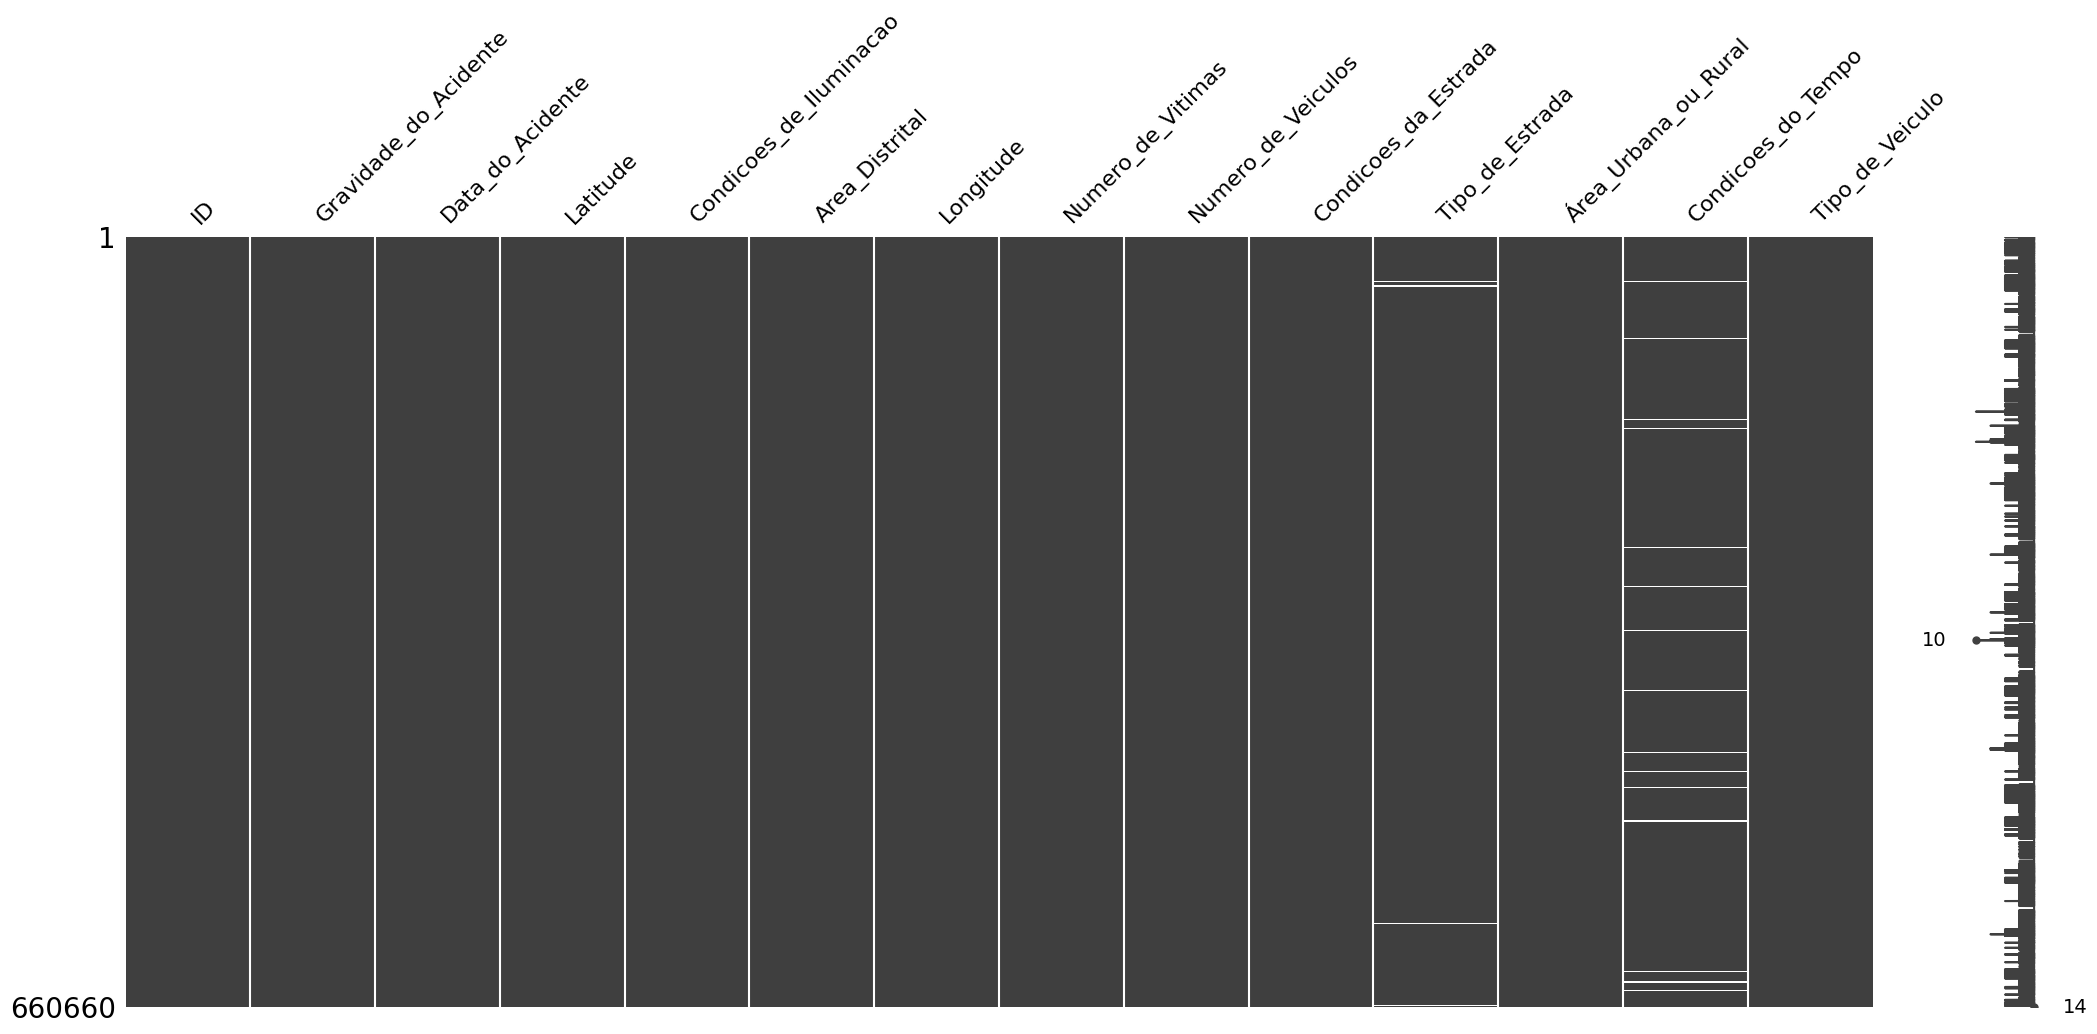

In [15]:
# visualizar os dados duplicados
msno.matrix(df)


As linhas pretas indicam a presença de dados, enquanto as linhas brancas representam a ausência de dados.

Essa representação visual facilita a identificação das colunas com valores vazios e a compreensão da proporção desses valores em relação ao total.

<Axes: >

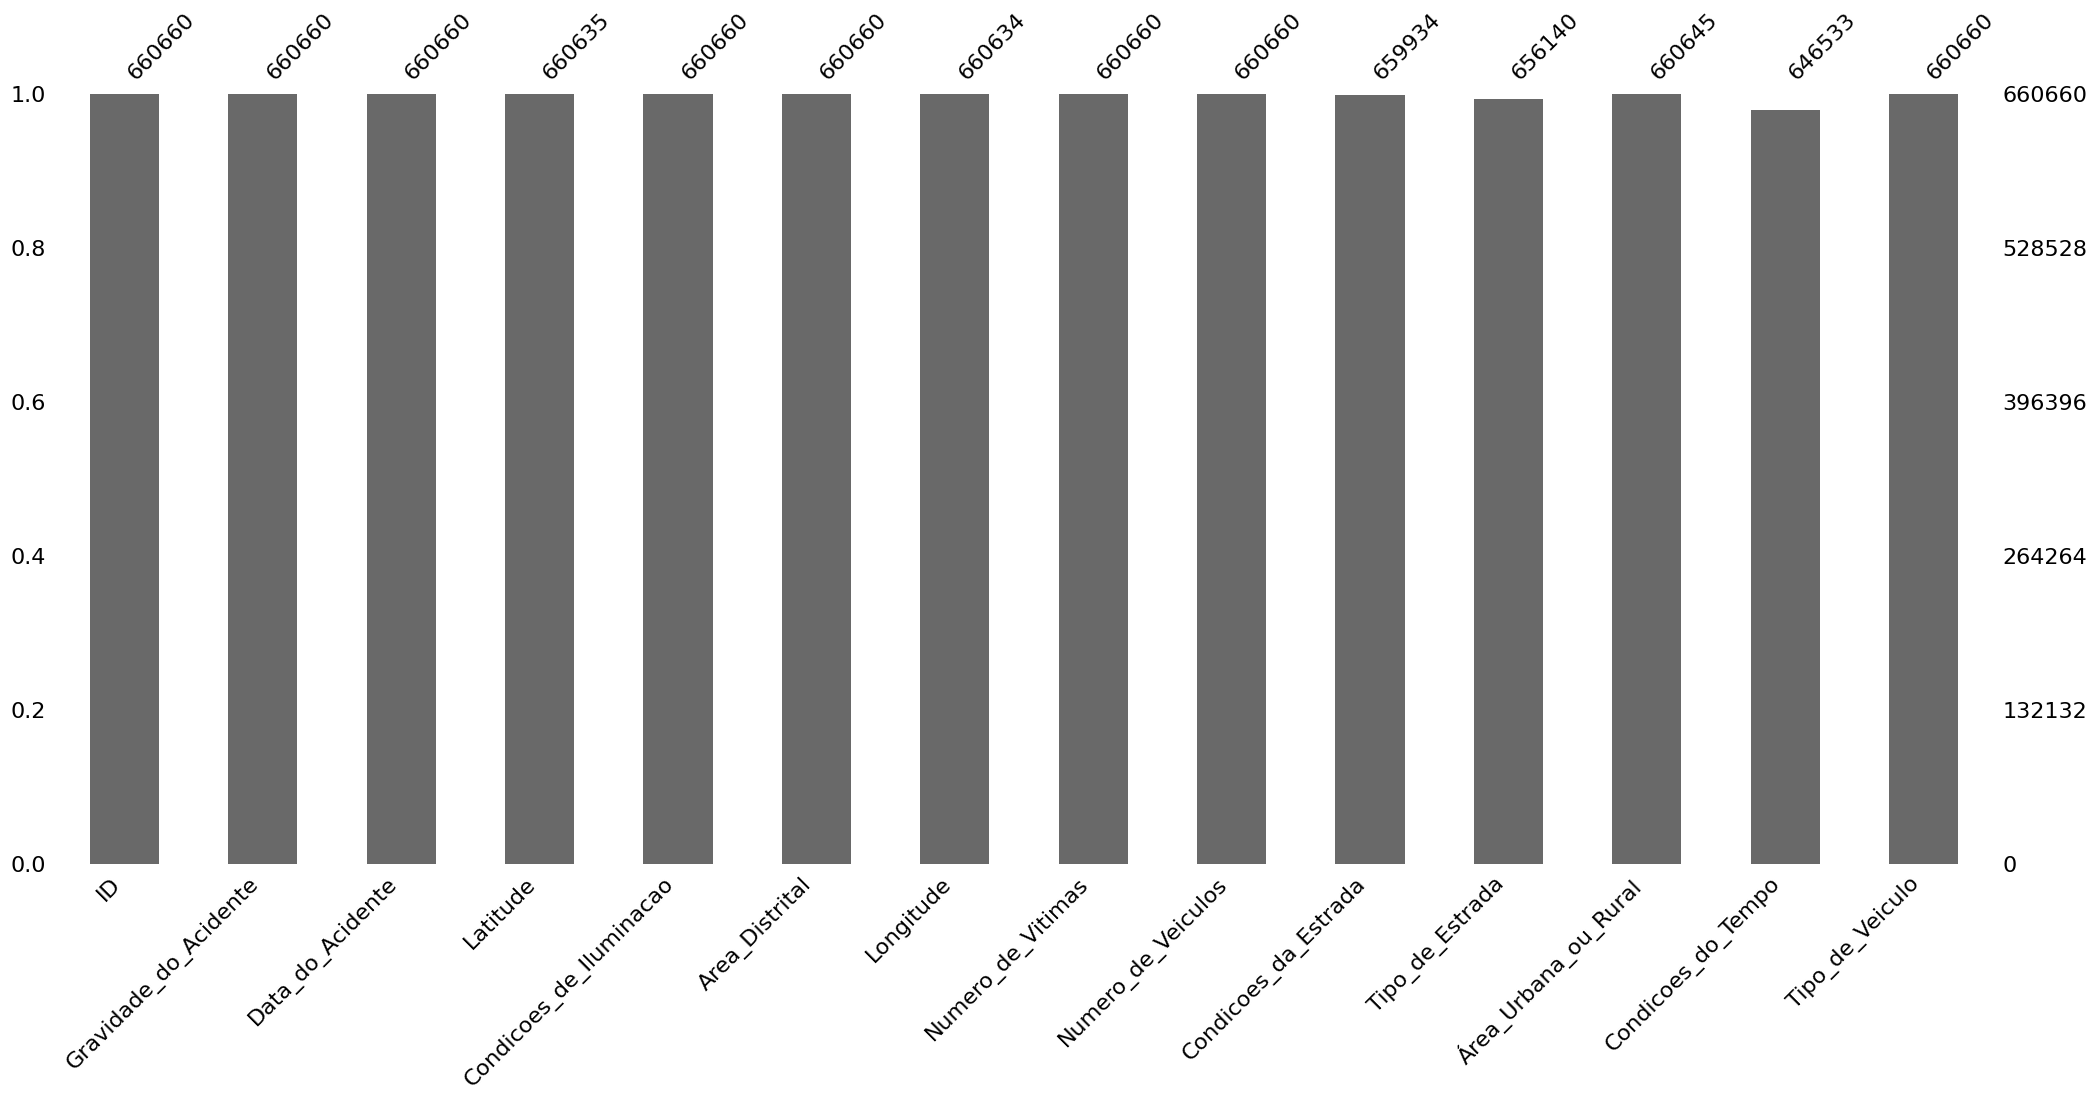

In [16]:
msno.bar(df)

Cada base de dados é única, e cada análise requer considerações específicas sobre quais informações, valores e abordagens utilizar para obter os melhores resultados com base nos objetivos da investigação.



In [17]:
# calcule a porcentagem de dados ausentes por coluna
porcentagem_ausente = (df.isnull().sum() / len(df)) * 100

# crie um novo DataFrame para visualização
df_ausente = pd.DataFrame({'Coluna': df.columns, 'Porcentagem Ausentes': porcentagem_ausente})

# classifique o DataFrame pela porcentagem de dados ausentes em ordem decrescente
df_ausente = df_ausente.sort_values(by='Porcentagem Ausentes', ascending=False)

print(df_ausente)


                                          Coluna  Porcentagem Ausentes
Condicoes_do_Tempo            Condicoes_do_Tempo              2.138316
Tipo_de_Estrada                  Tipo_de_Estrada              0.684164
Condicoes_da_Estrada        Condicoes_da_Estrada              0.109890
Longitude                              Longitude              0.003935
Latitude                                Latitude              0.003784
Área_Urbana_ou_Rural        Área_Urbana_ou_Rural              0.002270
ID                                            ID              0.000000
Gravidade_do_Acidente      Gravidade_do_Acidente              0.000000
Data_do_Acidente                Data_do_Acidente              0.000000
Condicoes_de_Iluminacao  Condicoes_de_Iluminacao              0.000000
Area_Distrital                    Area_Distrital              0.000000
Numero_de_Vitimas              Numero_de_Vitimas              0.000000
Numero_de_Veiculos            Numero_de_Veiculos              0.000000
Tipo_d

Temos uma porcentagem de 2,138 % de dados ausentes na coluna Condições do Tempo.

Vamos optar por excluir estas linhas, é uma quantidade pequena pelo tamanho do DF

In [18]:
df = df.dropna()

In [19]:
# verificar quantidade de dados ausentes
df.isnull().sum()

ID                         0
Gravidade_do_Acidente      0
Data_do_Acidente           0
Latitude                   0
Condicoes_de_Iluminacao    0
Area_Distrital             0
Longitude                  0
Numero_de_Vitimas          0
Numero_de_Veiculos         0
Condicoes_da_Estrada       0
Tipo_de_Estrada            0
Área_Urbana_ou_Rural       0
Condicoes_do_Tempo         0
Tipo_de_Veiculo            0
dtype: int64

In [20]:
df.shape

(642778, 14)

A decisão de realizar esse tipo de filtragem ainda demanda reflexão, considerando a análise que você está desenvolvendo.

### Organização dos dados e Estatísticas

In [21]:
# separar os tipo de dados objetos e numericos

colunas_objetos = df.select_dtypes(include=['object','bool']).columns
print('Colunas Objeto:')
print(colunas_objetos)

colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
print('Colunas Numéricas:')
print(colunas_numericas)

Colunas Objeto:
Index(['ID', 'Gravidade_do_Acidente', 'Data_do_Acidente',
       'Condicoes_de_Iluminacao', 'Area_Distrital', 'Condicoes_da_Estrada',
       'Tipo_de_Estrada', 'Área_Urbana_ou_Rural', 'Condicoes_do_Tempo',
       'Tipo_de_Veiculo'],
      dtype='object')
Colunas Numéricas:
Index(['Latitude', 'Longitude', 'Numero_de_Vitimas', 'Numero_de_Veiculos'], dtype='object')


In [22]:
# converter a coluna Data do Acidente em datetime
df['Data_do_Acidente'] = pd.to_datetime(df['Data_do_Acidente'], dayfirst=True)
df.head()

ID Gravidade_do_Acidente Data_do_Acidente   Latitude  \
0  200701BS64157               Serious       2019-06-05  51.506187   
1  200701BS65737               Serious       2019-07-02  51.495029   
3  200701BS66128               Serious       2019-08-16  51.495478   
5  200701BS67159               Serious       2019-09-18  51.497750   
6  200701BS67207               Serious       2019-09-05  51.501405   

  Condicoes_de_Iluminacao          Area_Distrital  Longitude  \
0   Darkness - lights lit  Kensington and Chelsea  -0.209082   
1                Daylight  Kensington and Chelsea  -0.173647   
3                Daylight  Kensington and Chelsea  -0.202731   
5                Daylight  Kensington and Chelsea  -0.192556   
6                Daylight  Kensington and Chelsea  -0.161577   

   Numero_de_Vitimas  Numero_de_Veiculos Condicoes_da_Estrada  \
0                  1                   2                  Dry   
1                  1                   2          Wet or damp   
3                  1                   4                  Dry   
5                  2                   3                  Dry   
6                  1                   2                  Dry   

      Tipo_de_Estrada Área_Urbana_ou_Rural     Condicoes_do_Tempo  \
0  Single carriageway                Urban     Fine no high winds   
1  Single carriageway                Urban  Raining no high winds   
3  Single carriageway                Urban     Fine no high winds   
5  Single carriageway                Urban     Fine no high winds   
6    Dual carriageway                Urban     Fine no high winds   

                        Tipo_de_Veiculo  
0                                   Car  
1                                   Car  
3  Bus or coach (17 or more pass seats)  
5                                   Car  
6   Van / Goods 3.5 tonnes mgw or under

dayfirst=True: Este é um argumento opcional que indica ao pandas que os primeiros dois elementos no formato da data representam o dia e o mês, respectivamente. Isso é útil para evitar ambiguidades na interpretação de datas em formatos diferentes.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 642778 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ID                       642778 non-null  object        
 1   Gravidade_do_Acidente    642778 non-null  object        
 2   Data_do_Acidente         642778 non-null  datetime64[ns]
 3   Latitude                 642778 non-null  float64       
 4   Condicoes_de_Iluminacao  642778 non-null  object        
 5   Area_Distrital           642778 non-null  object        
 6   Longitude                642778 non-null  float64       
 7   Numero_de_Vitimas        642778 non-null  int64         
 8   Numero_de_Veiculos       642778 non-null  int64         
 9   Condicoes_da_Estrada     642778 non-null  object        
 10  Tipo_de_Estrada          642778 non-null  object        
 11  Área_Urbana_ou_Rural     642778 non-null  object        
 12  Condicoes_do_Tempo   

In [24]:
# definir uma função para classificar as características do DF
# a função retorna quatro listas que contêm os nomes das características 
def classif_caracteristicas(df):
    categoricas = []
    nao_categoricas = []
    discretas = []
    continuas = []

    # itera sobre as colunas do DataFrame
    for column in df.columns:
        # verifica se o tipo de dado é 'object' ou 'bool'
        if df[column].dtype in ['object', 'bool']:
            # se a coluna tiver menos de 15 valores únicos, é considerada categórica
            if df[column].nunique() < 15:
                categoricas.append(column)
            else:
                nao_categoricas.append(column)
        # se o tipo de dado for 'int64' ou 'float64'
        elif df[column].dtype in ['int64', 'float64']:
            # se a coluna tiver menos de 10 valores únicos, é considerada discreta
            if df[column].nunique() < 10:
                discretas.append(column)
            else:
                continuas.append(column)

    # Retorna as listas de características classificadas
    return categoricas, nao_categoricas, discretas, continuas


In [25]:
# aplicando a função no DF
categoricas, nao_categoricas, discretas, continuas = classif_caracteristicas(df)

In [26]:
# imprimindo as características
print('Categoricas', categoricas)
print('Não Categoricas', nao_categoricas)
print('Discretas', discretas)
print('Continuas', continuas)

Categoricas ['Gravidade_do_Acidente', 'Condicoes_de_Iluminacao', 'Condicoes_da_Estrada', 'Tipo_de_Estrada', 'Área_Urbana_ou_Rural', 'Condicoes_do_Tempo']
Não Categoricas ['ID', 'Area_Distrital', 'Tipo_de_Veiculo']
Discretas []
Continuas ['Latitude', 'Longitude', 'Numero_de_Vitimas', 'Numero_de_Veiculos']


A coluna Data do Acidente esta como datetime, podemos manipular os dados diretamente, não é necessário classificar.

Vamos remover as colunas Latitude e Longitudo da lista continuas, não faz sentido fazer com parativo do posicionamento geografico neste momento. 

In [27]:
continuas.remove('Latitude')
continuas.remove('Longitude')

In [28]:
# visualizar os dados unicos das colunas por características
for i in categoricas:
    print(i, ':')
    print(df[i].unique())
    print()

Gravidade_do_Acidente :
['Serious' 'Fatal' 'Slight']

Condicoes_de_Iluminacao :
['Darkness - lights lit' 'Daylight' 'Darkness - lights unlit'
 'Darkness - lighting unknown' 'Darkness - no lighting']

Condicoes_da_Estrada :
['Dry' 'Wet or damp' 'Snow' 'Frost or ice' 'Flood over 3cm. deep']

Tipo_de_Estrada :
['Single carriageway' 'Dual carriageway' 'One way street' 'Roundabout'
 'Slip road']

Área_Urbana_ou_Rural :
['Urban' 'Rural' 'Unallocated']

Condicoes_do_Tempo :
['Fine no high winds' 'Raining no high winds' 'Other' 'Fine + high winds'
 'Raining + high winds' 'Snowing no high winds' 'Fog or mist'
 'Snowing + high winds']



In [29]:
# traduzir os dados para português para melhor entendimento
df['Gravidade_do_Acidente'] = df['Gravidade_do_Acidente'].replace({'Serious':'Serio', 'Fatal':'Fatal', 'Slight':'Leve'})

In [30]:
df['Condicoes_de_Iluminacao'] = df['Condicoes_de_Iluminacao'].replace({'Darkness - lights lit':'Escuridao - luzes acesas', 'Daylight':'Luz do dia', 
'Darkness - lights unlit':'Escuridao - luz apagadas', 'Darkness - lighting unknown':'Escuridao - iluminacao desconhecida',
'Darkness - no lighting':'Escruridao - sem iluminacao'})

In [31]:
df['Condicoes_da_Estrada'] = df['Condicoes_da_Estrada'].replace({'Dry':'Seco', 'Wet or damp':'Molhado ou umido', 'Snow':'Neve', 
'Frost or ice':'Gelo', 'Flood over 3cm. deep':'Inundacao acima de 3cm'})

In [32]:
df['Tipo_de_Estrada'] = df['Tipo_de_Estrada'].replace({'Single carriageway':'Pista unica', 'Dual carriageway':'Pista dupla', 
'One way street':'Rua de mao unica', 'Roundabout':'Rotatoria', 'Slip road':'Estrada de acesso'})

In [33]:
df['Área_Urbana_ou_Rural'] = df['Área_Urbana_ou_Rural'].replace({'Urban':'Urbano', 'Rural':'Rural', 'Unallocated':'Outros'})

In [34]:
df['Condicoes_do_Tempo'] = df['Condicoes_do_Tempo'].replace({'Fine no high winds':'Bom, sem ventos fortes', 'Raining no high winds':'Chovendo, sem ventos fortes', 
'Other':'Outros', 'Fine + high winds':'Bom, ventos fortes', 'Raining + high winds':'Chovendo, ventos fortes', 'Snowing no high winds':'Nevando, sem ventos fortes',
'Fog or mist':'Nevoeiro ou neblina', 'Snowing + high winds':'Nevando, ventos fortes'})

In [35]:
# visualizar os dados unicos das colunas por características
for i in categoricas:
    print(i, ':')
    print(df[i].unique())
    print()

Gravidade_do_Acidente :
['Serio' 'Fatal' 'Leve']

Condicoes_de_Iluminacao :
['Escuridao - luzes acesas' 'Luz do dia' 'Escuridao - luz apagadas'
 'Escuridao - iluminacao desconhecida' 'Escruridao - sem iluminacao']

Condicoes_da_Estrada :
['Seco' 'Molhado ou umido' 'Neve' 'Gelo' 'Inundacao acima de 3cm']

Tipo_de_Estrada :
['Pista unica' 'Pista dupla' 'Rua de mao unica' 'Rotatoria'
 'Estrada de acesso']

Área_Urbana_ou_Rural :
['Urbano' 'Rural' 'Outros']

Condicoes_do_Tempo :
['Bom, sem ventos fortes' 'Chovendo, sem ventos fortes' 'Outros'
 'Bom, ventos fortes' 'Chovendo, ventos fortes'
 'Nevando, sem ventos fortes' 'Nevoeiro ou neblina'
 'Nevando, ventos fortes']



In [36]:
# visualizar quantidades unicas por características
for i in categoricas:
    print(df[i].value_counts())
    print()

Gravidade_do_Acidente
Leve     547703
Serio     86551
Fatal      8524
Name: count, dtype: int64

Condicoes_de_Iluminacao
Luz do dia                             471910
Escuridao - luzes acesas               126767
Escruridao - sem iluminacao             36863
Escuridao - iluminacao desconhecida      4766
Escuridao - luz apagadas                 2472
Name: count, dtype: int64

Condicoes_da_Estrada
Seco                      433963
Molhado ou umido          183808
Gelo                       18210
Neve                        5803
Inundacao acima de 3cm       994
Name: count, dtype: int64

Tipo_de_Estrada
Pista unica          482267
Pista dupla           97638
Rotatoria             42757
Rua de mao unica      13223
Estrada de acesso      6893
Name: count, dtype: int64

Área_Urbana_ou_Rural
Urbano    408915
Rural     233860
Outros         3
Name: count, dtype: int64

Condicoes_do_Tempo
Bom, sem ventos fortes         517861
Chovendo, sem ventos fortes     79257
Outros                          

In [37]:
# estatística descritivas
# continuas e datas
display(df.describe().round(3).T)
# categoricas
display(df.describe(include= ['object', 'bool', 'category']).T)

count                           mean  \
Data_do_Acidente      642778  2020-12-01 11:37:35.296851200   
Latitude            642778.0                         52.554   
Longitude           642778.0                         -1.425   
Numero_de_Vitimas   642778.0                           1.36   
Numero_de_Veiculos  642778.0                          1.833   

                                    min                  25%  \
Data_do_Acidente    2019-01-01 00:00:00  2019-11-28 00:00:00   
Latitude                         49.914                51.49   
Longitude                        -7.516               -2.321   
Numero_de_Vitimas                   1.0                  1.0   
Numero_de_Veiculos                  1.0                  1.0   

                                    50%                  75%  \
Data_do_Acidente    2020-11-14 00:00:00  2021-11-18 00:00:00   
Latitude                         52.305               53.456   
Longitude                        -1.406               -0.229   
Numero_de_Vitimas                   1.0                  1.0   
Numero_de_Veiculos                  2.0                  2.0   

                                    max    std  
Data_do_Acidente    2022-12-31 00:00:00    NaN  
Latitude                         60.758   1.41  
Longitude                         1.762  1.382  
Numero_de_Vitimas                  68.0  0.828  
Numero_de_Veiculos                 32.0  0.717

count  unique                     top    freq
ID                       642778  410527                2.01E+12  232070
Gravidade_do_Acidente    642778       3                    Leve  547703
Condicoes_de_Iluminacao  642778       5              Luz do dia  471910
Area_Distrital           642778     422              Birmingham   12980
Condicoes_da_Estrada     642778       5                    Seco  433963
Tipo_de_Estrada          642778       5             Pista unica  482267
Área_Urbana_ou_Rural     642778       3                  Urbano  408915
Condicoes_do_Tempo       642778       8  Bom, sem ventos fortes  517861
Tipo_de_Veiculo          642778      16                     Car  484475

Coluna ID ainda esta no DF, vamos tirar mais a frente para não prejudicar na analise

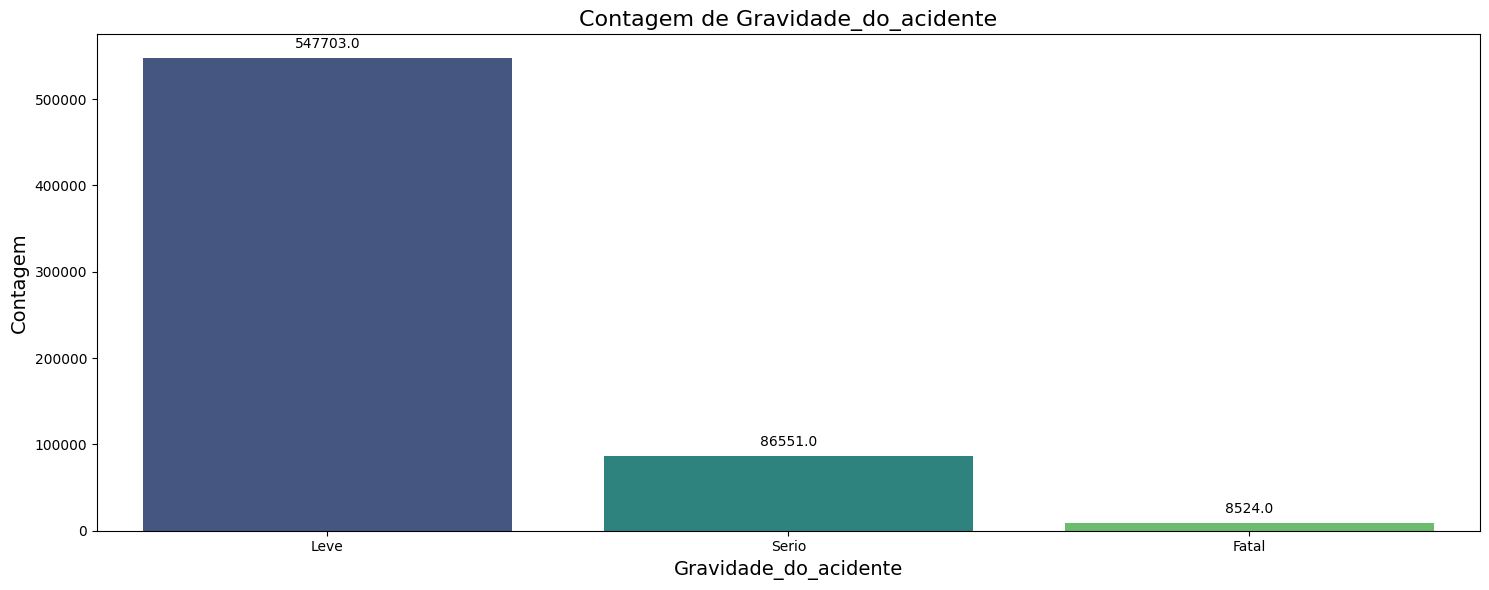

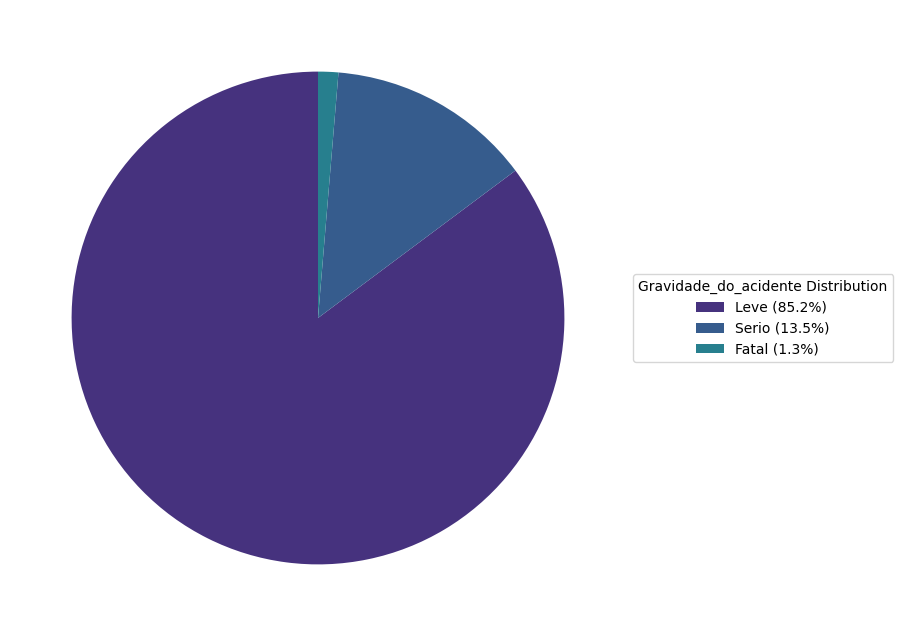

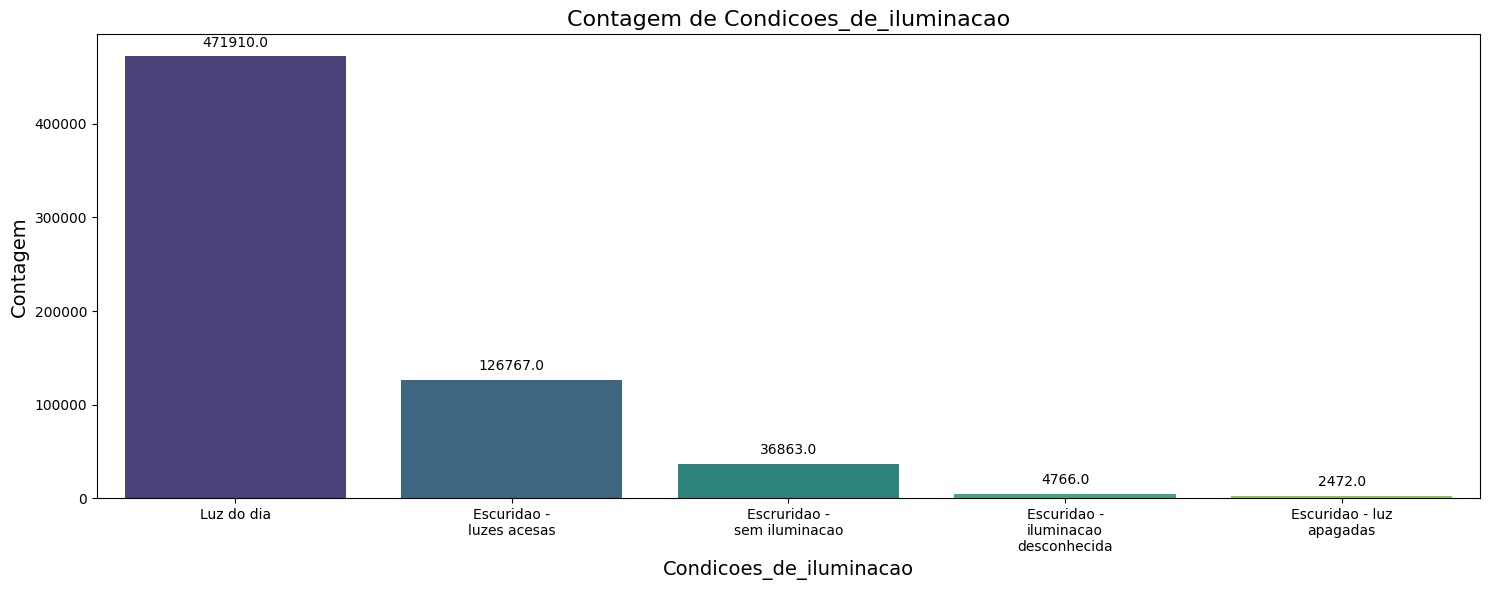

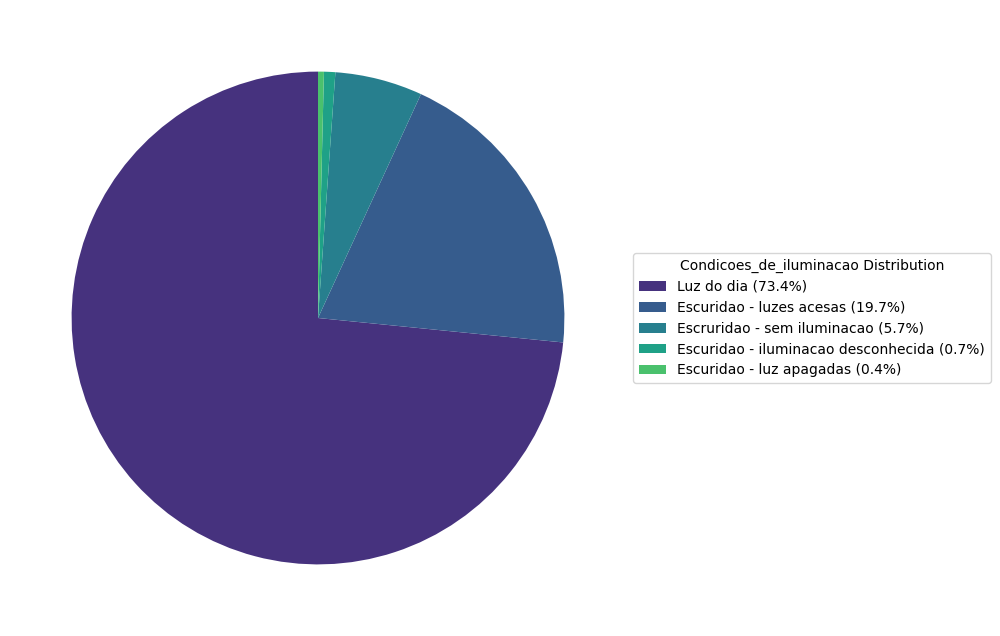

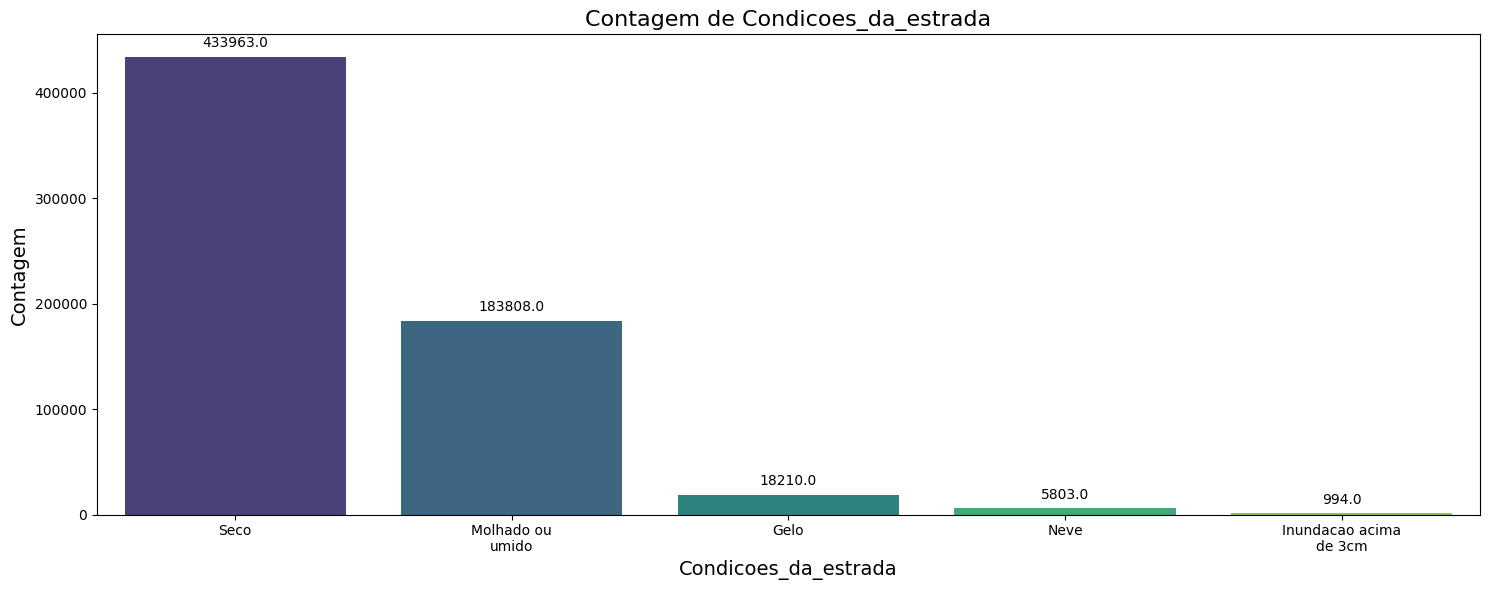

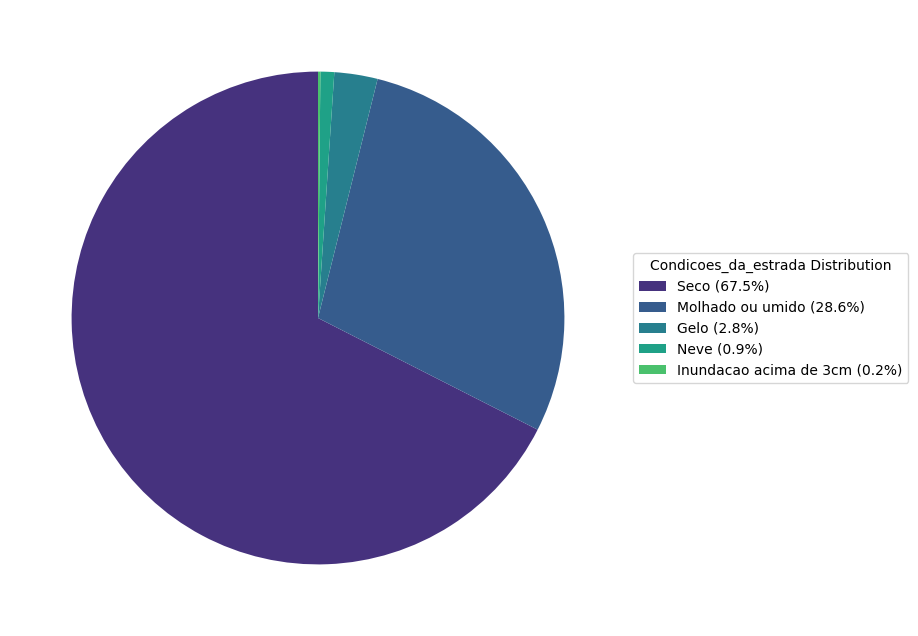

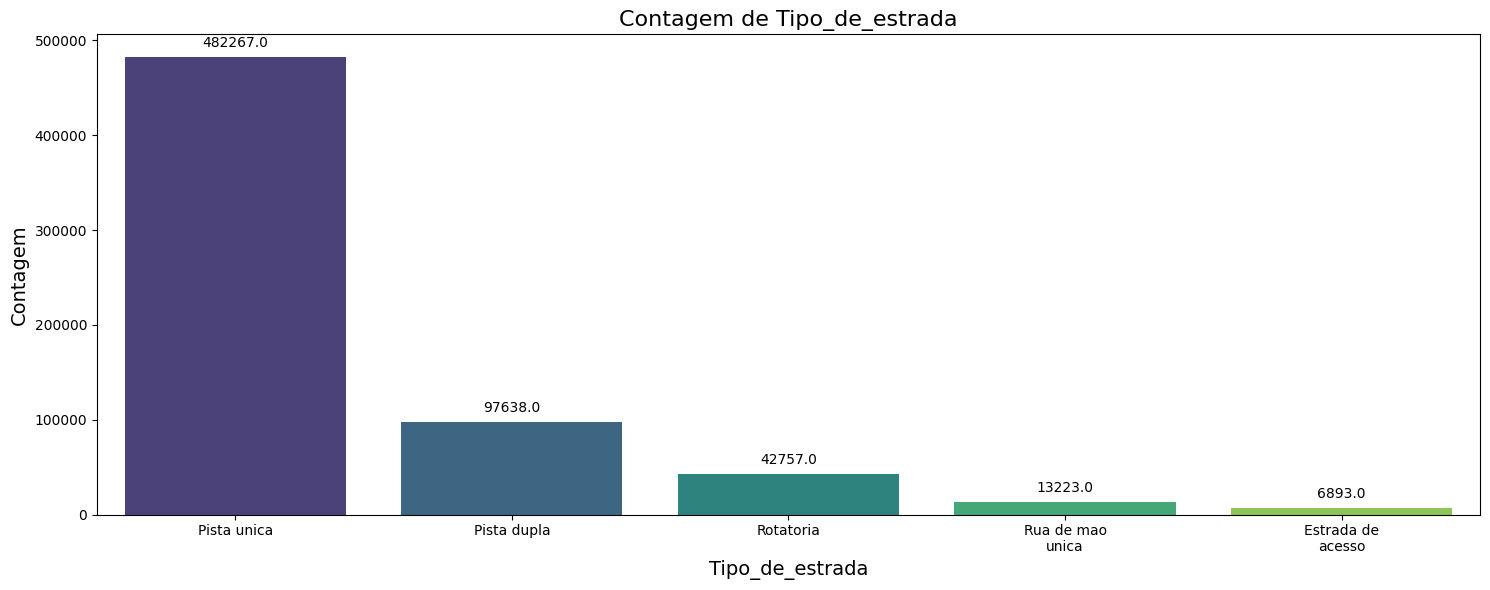

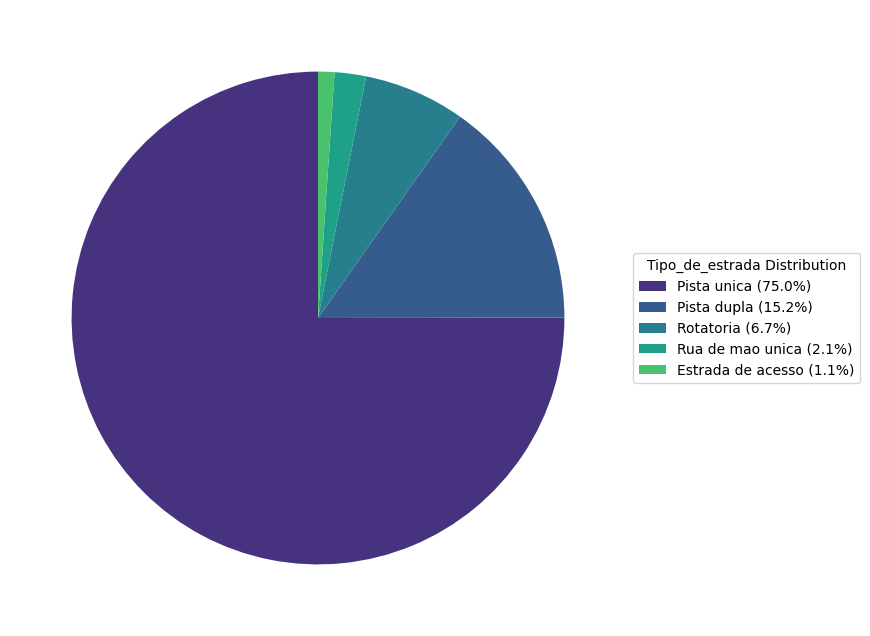

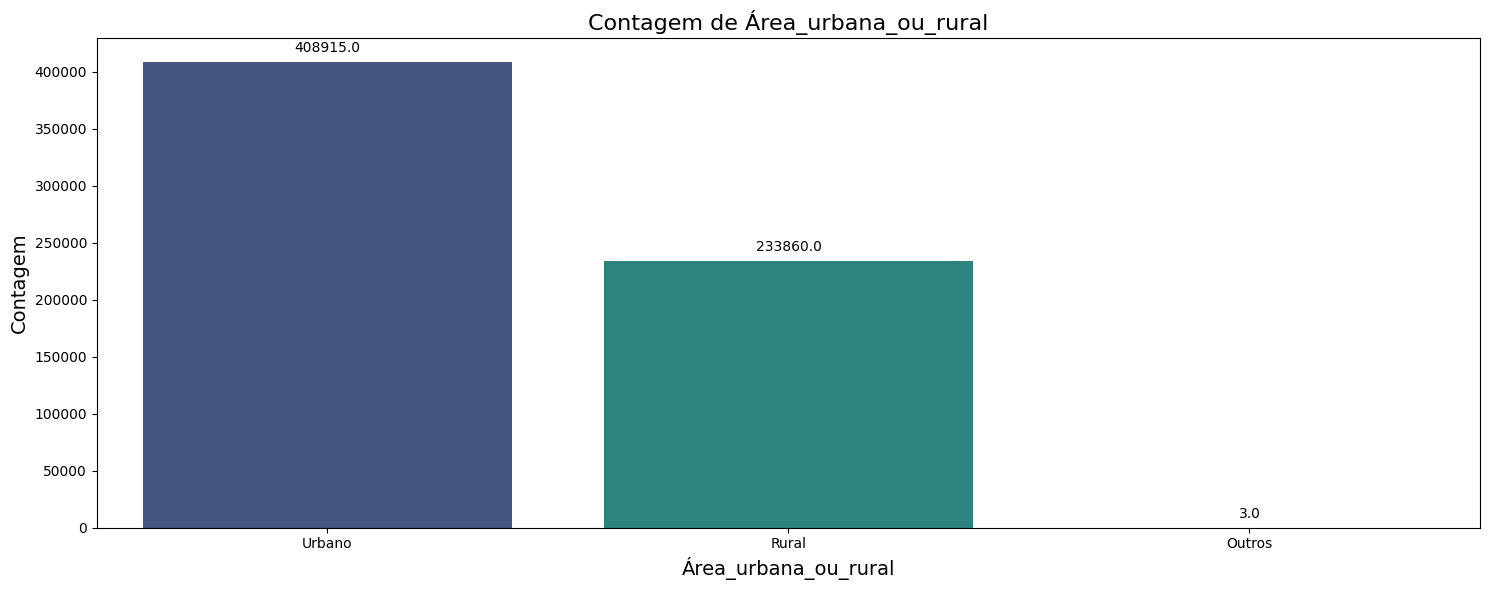

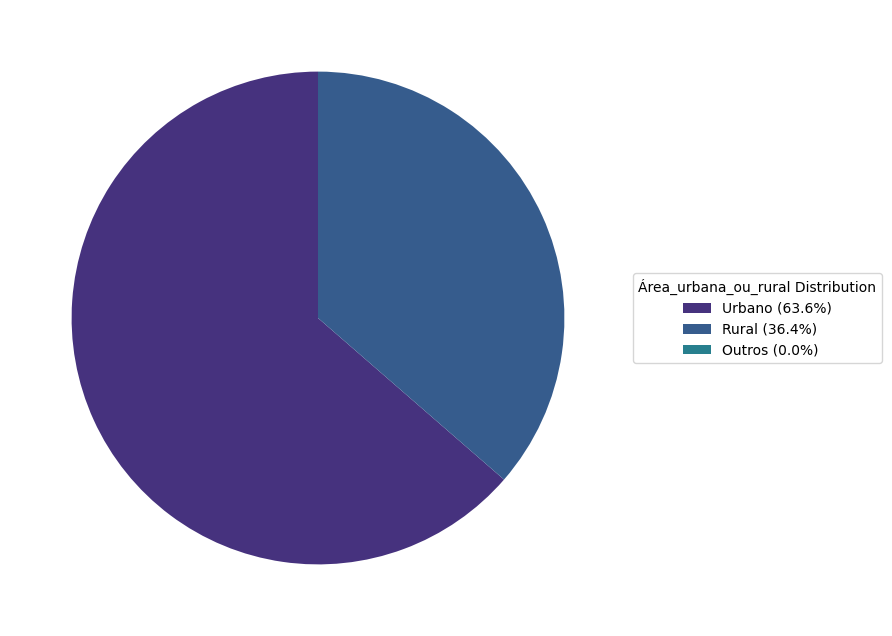

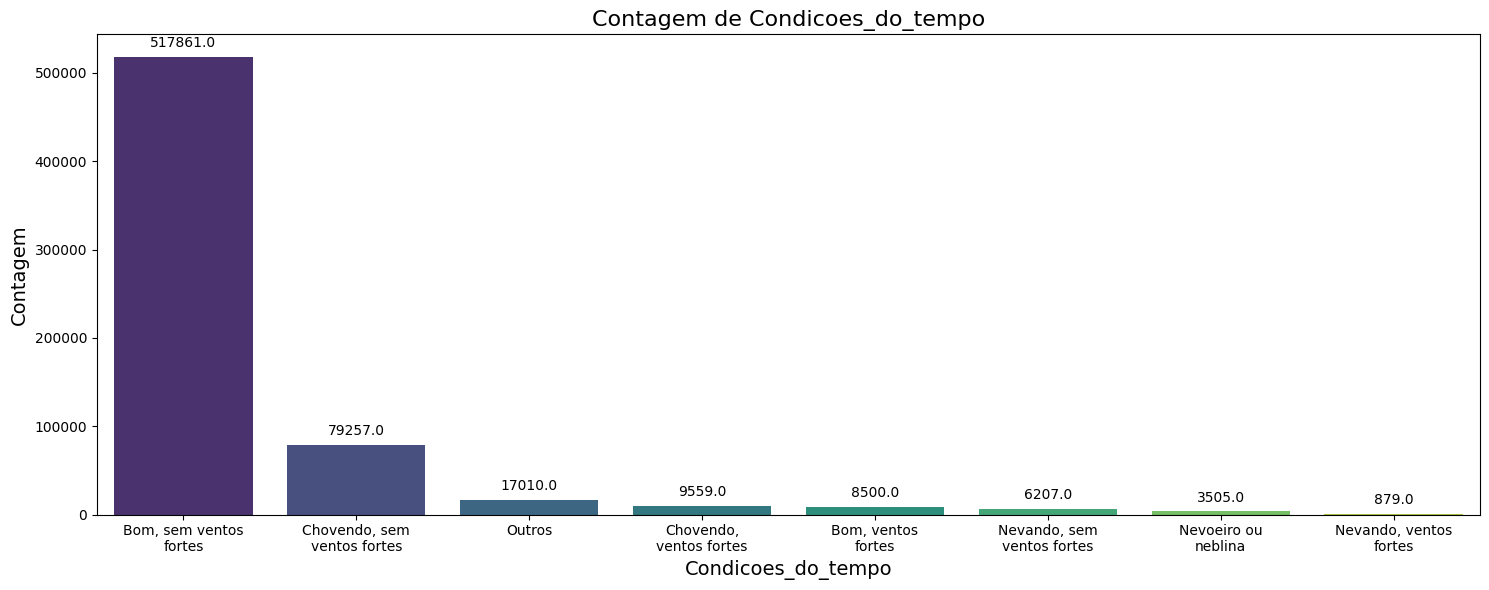

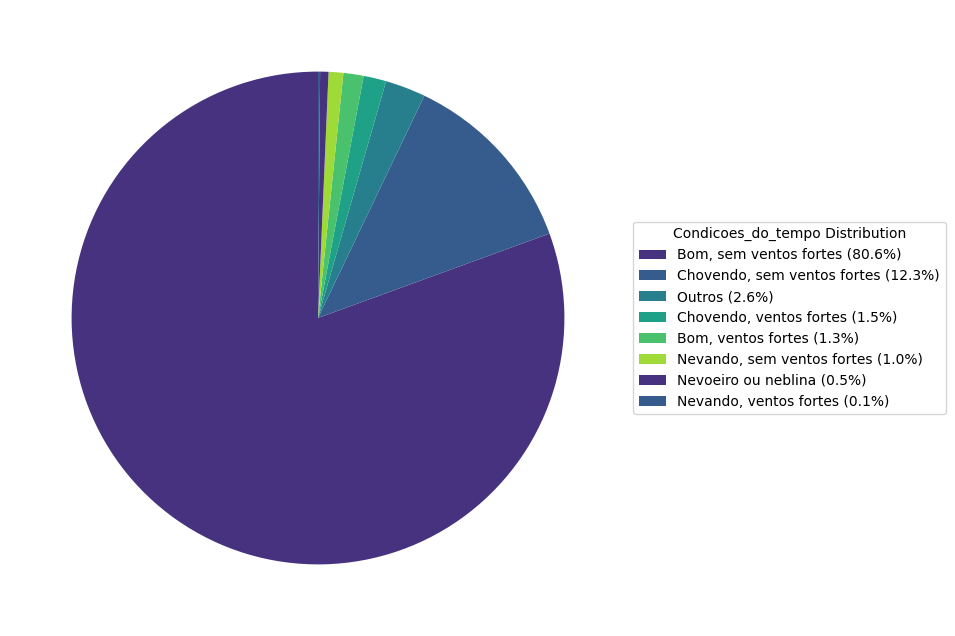

In [38]:
# platando gráfico as variáveis categóricas
for i in categoricas:
    # configuração do subplot apenas para o gráfico de barras
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='viridis', order=df[i].value_counts().index)

    # adicionar rótulos
    ax.set_xlabel(i.capitalize(), fontsize=14)
    ax.set_ylabel('Contagem', fontsize=14)
    ax.set_title(f'Contagem de {i.capitalize()}', fontsize=16)

    # quebra de linha nos rótulos do eixo x
    labels = ['\n'.join(textwrap.wrap(str(label.get_text()), width=15)) for label in ax.get_xticklabels()]
    ax.set_xticklabels(labels, fontsize=10)

    # adicionar anotações
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

    # ajustar layout
    plt.tight_layout()

    plt.show()

    # configuração do subplot apenas para o gráfico de pizza
    plt.figure(figsize=(8, 8))
    df_pie = df[i].value_counts()

    # gráfico de pizza sem rótulos
    plt.pie(df_pie, labels=None, autopct='', startangle=90, colors=sns.color_palette('viridis'))

    # adicionar legenda com porcentagens
    legend_labels = [f'{label} ({percent:.1f}%)' for label, percent in zip(df_pie.index, df_pie / df_pie.sum() * 100)]
    plt.legend(legend_labels, title=f'{i.capitalize()} Distribution', loc='center left', bbox_to_anchor=(1, 0.5))

    # ajuste do tamanho do gráfico de pizza
    plt.gca().set_aspect('equal')  # garantir que o gráfico de pizza seja circular

    plt.show()


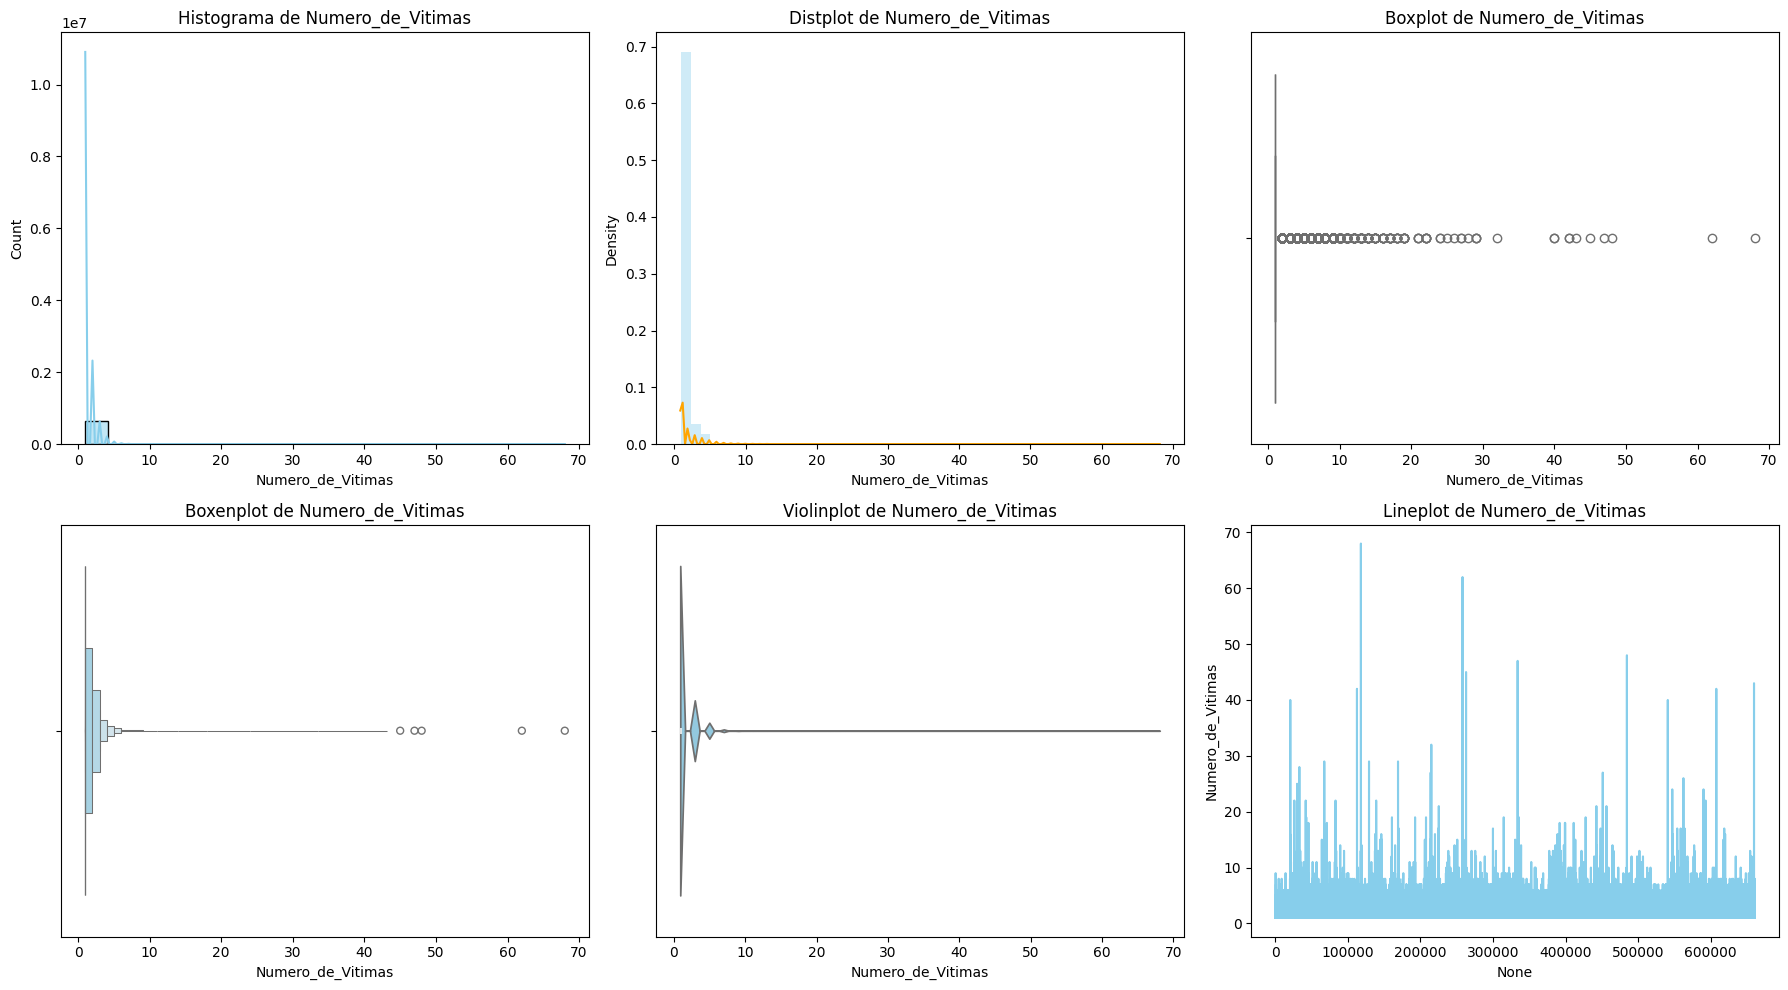

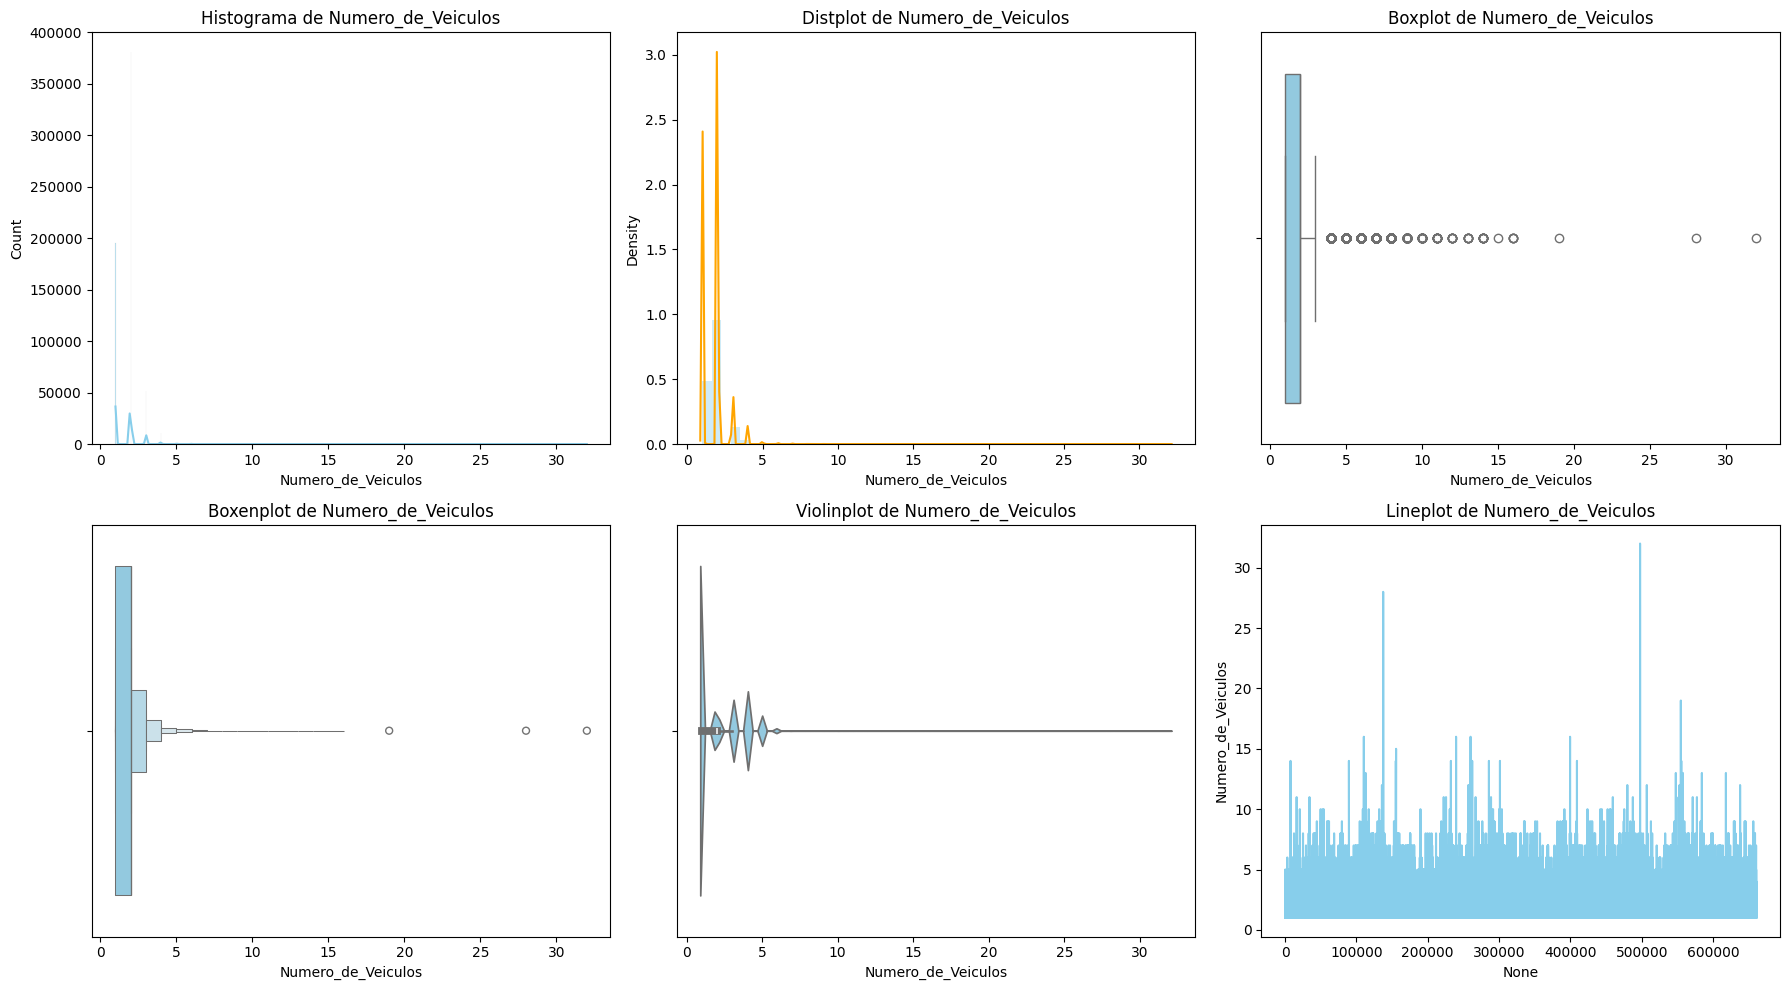

In [39]:
# platando gráfico das variáveis contínuas
for i in continuas:
    # criando a figura e os eixos
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
    
    # gráfico 1: Histograma
    sns.histplot(df[i], kde=True, ax=axs[0, 0], color='skyblue')
    axs[0, 0].set_title(f'Histograma de {i}')

    # gráfico 2: Distplot (histograma com curva de densidade)
    sns.distplot(df[i], ax=axs[0, 1], hist_kws={'color': 'skyblue'}, kde_kws={'color': 'orange'})
    axs[0, 1].set_title(f'Distplot de {i}')

    # gráfico 3: Boxplot
    sns.boxplot(x=df[i], ax=axs[0, 2], color='skyblue')
    axs[0, 2].set_title(f'Boxplot de {i}')

    # gráfico 4: Boxenplot
    sns.boxenplot(x=df[i], ax=axs[1, 0], color='skyblue')
    axs[1, 0].set_title(f'Boxenplot de {i}')

    # gráfico 5: Violinplot
    sns.violinplot(x=df[i], ax=axs[1, 1], color='skyblue')
    axs[1, 1].set_title(f'Violinplot de {i}')

    # gráfico 6: Lineplot
    sns.lineplot(x=df.index, y=df[i], ax=axs[1, 2], color='skyblue')
    axs[1, 2].set_title(f'Lineplot de {i}')

    # ajustando o layout
    plt.tight_layout()

    # mostrando os gráficos
    plt.show()


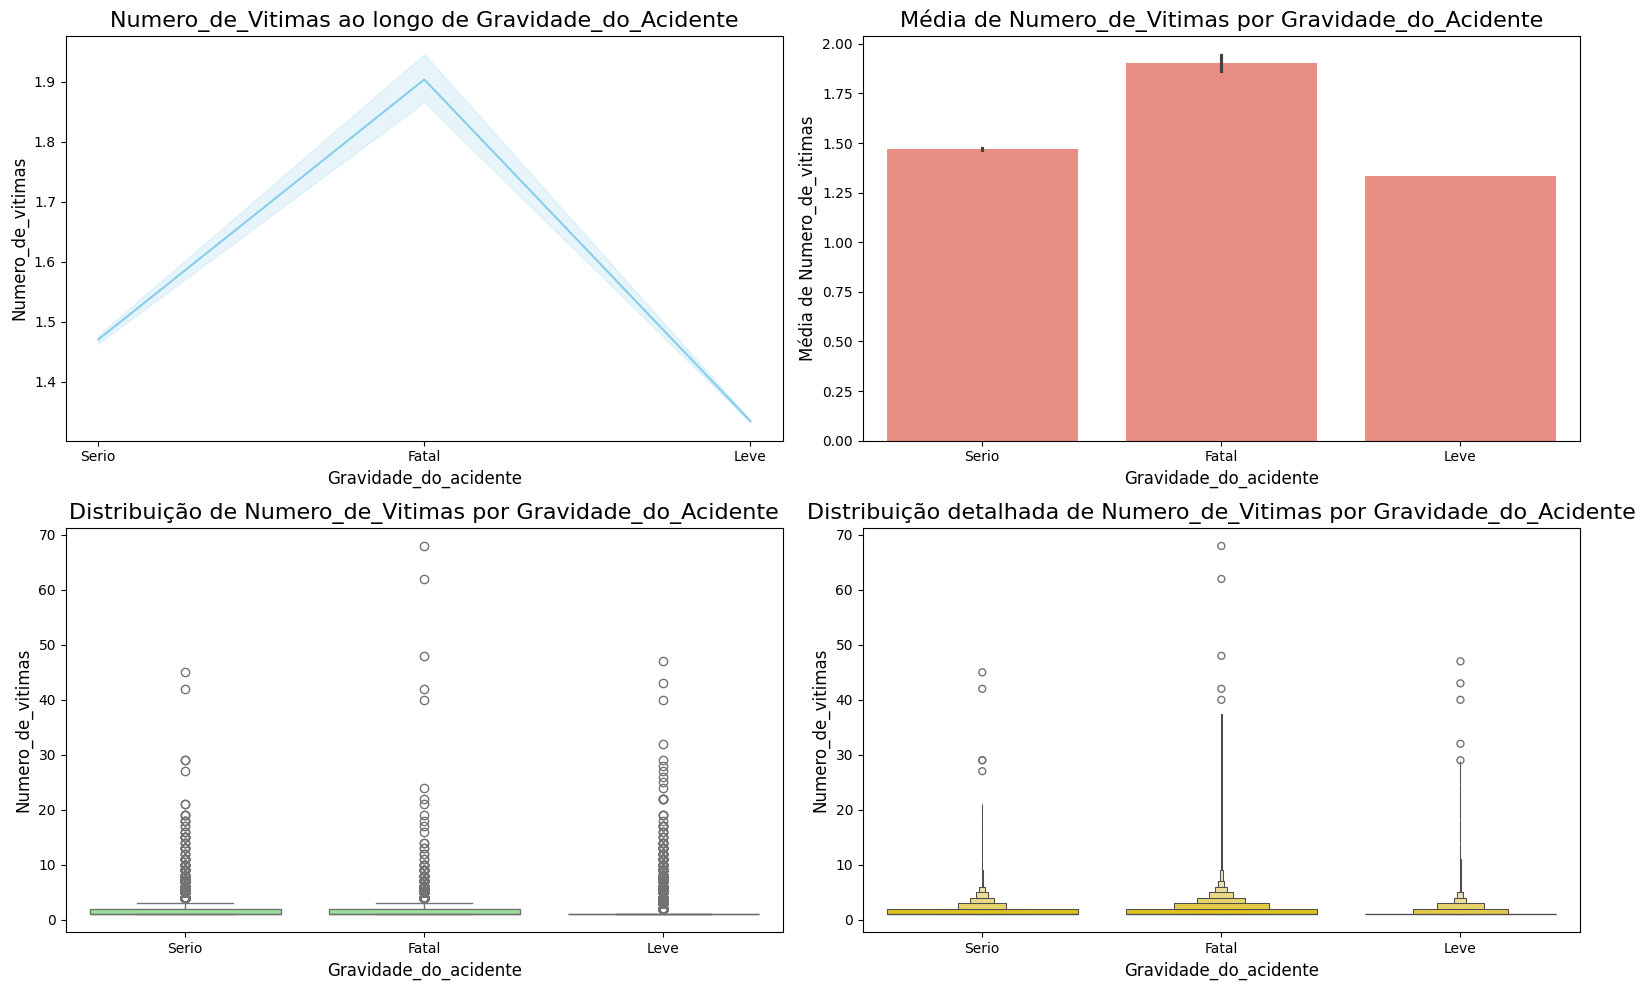

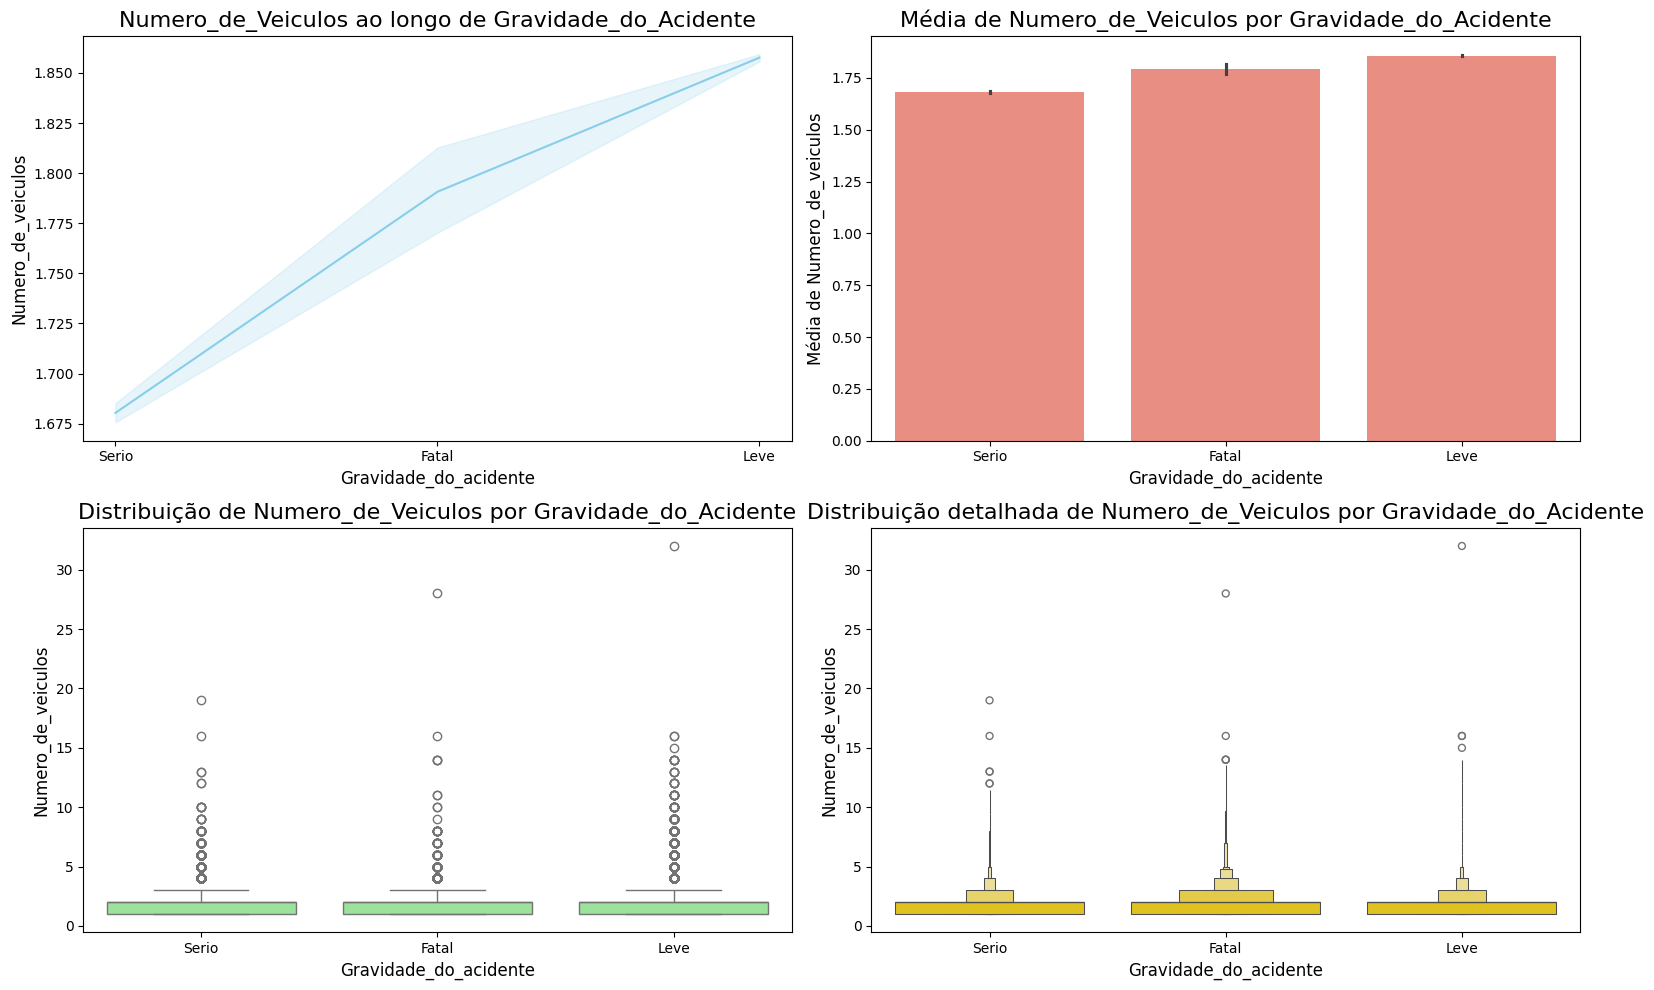

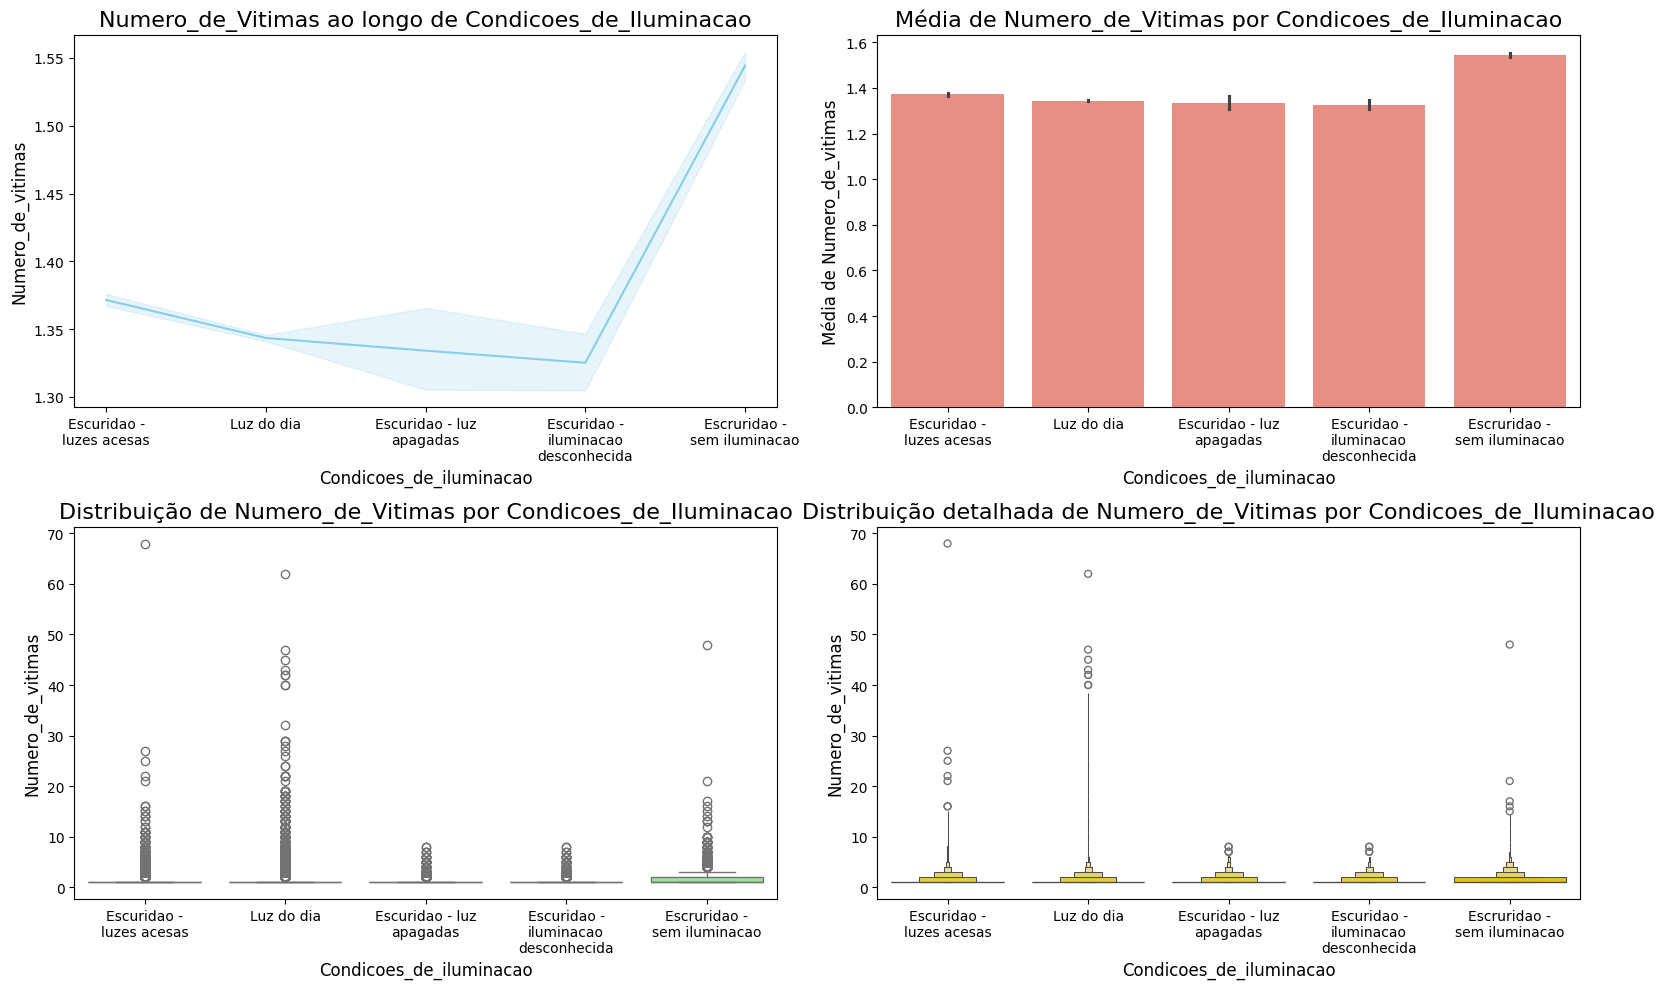

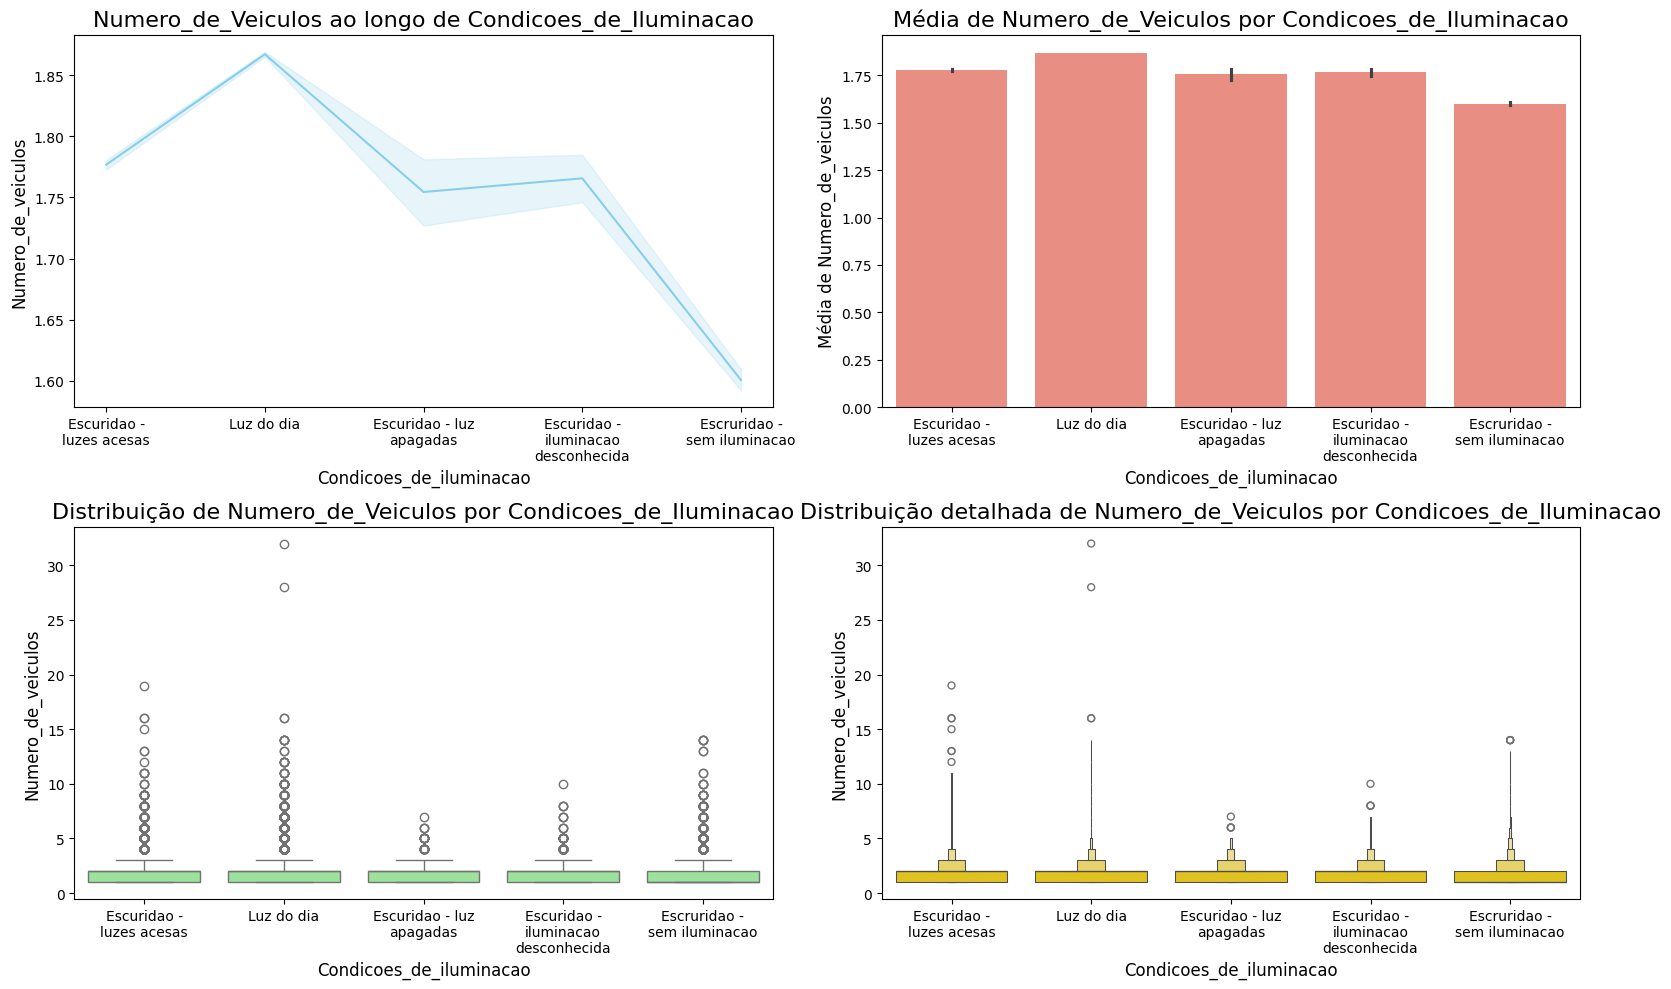

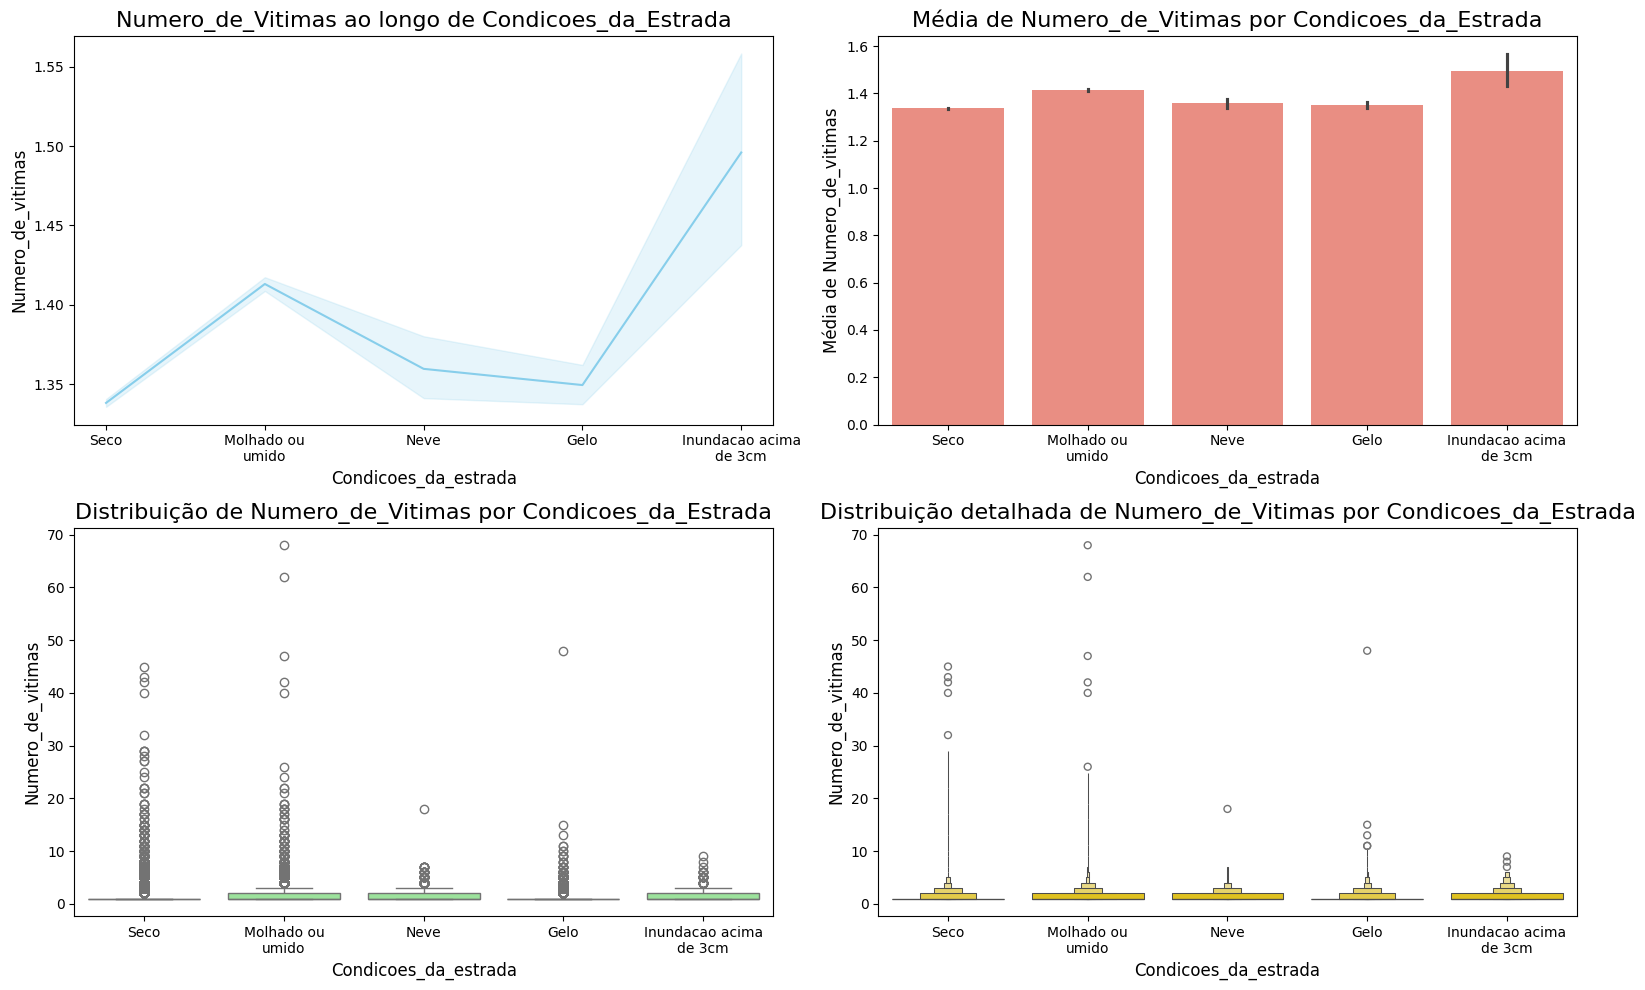

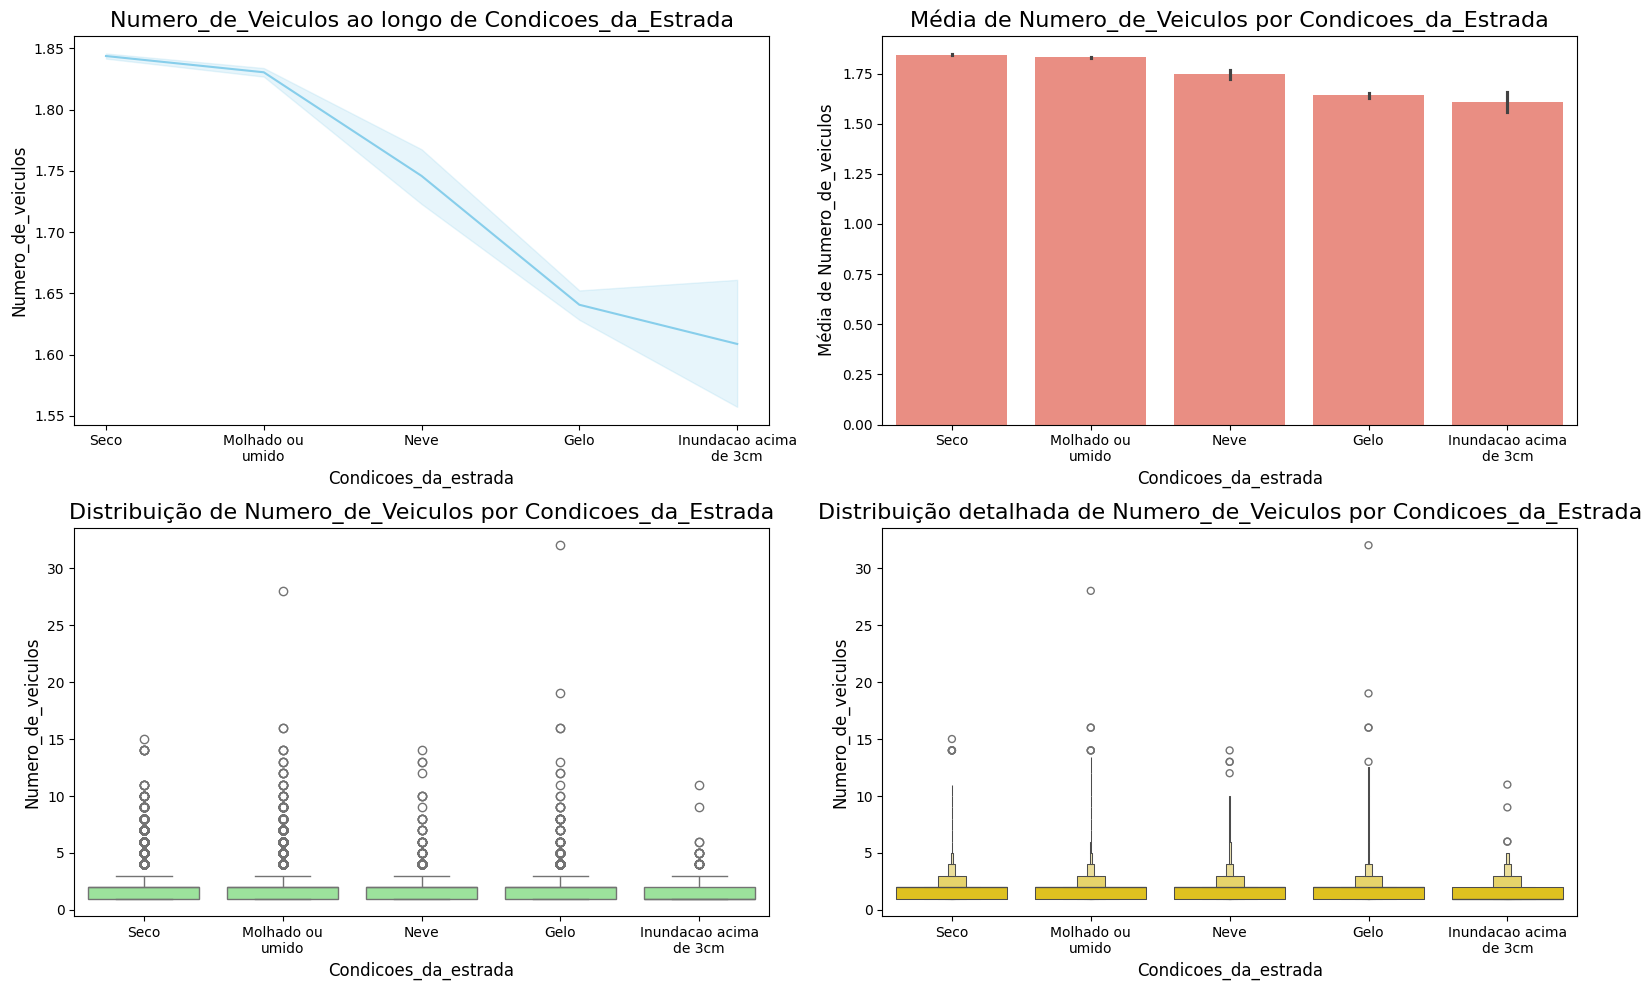

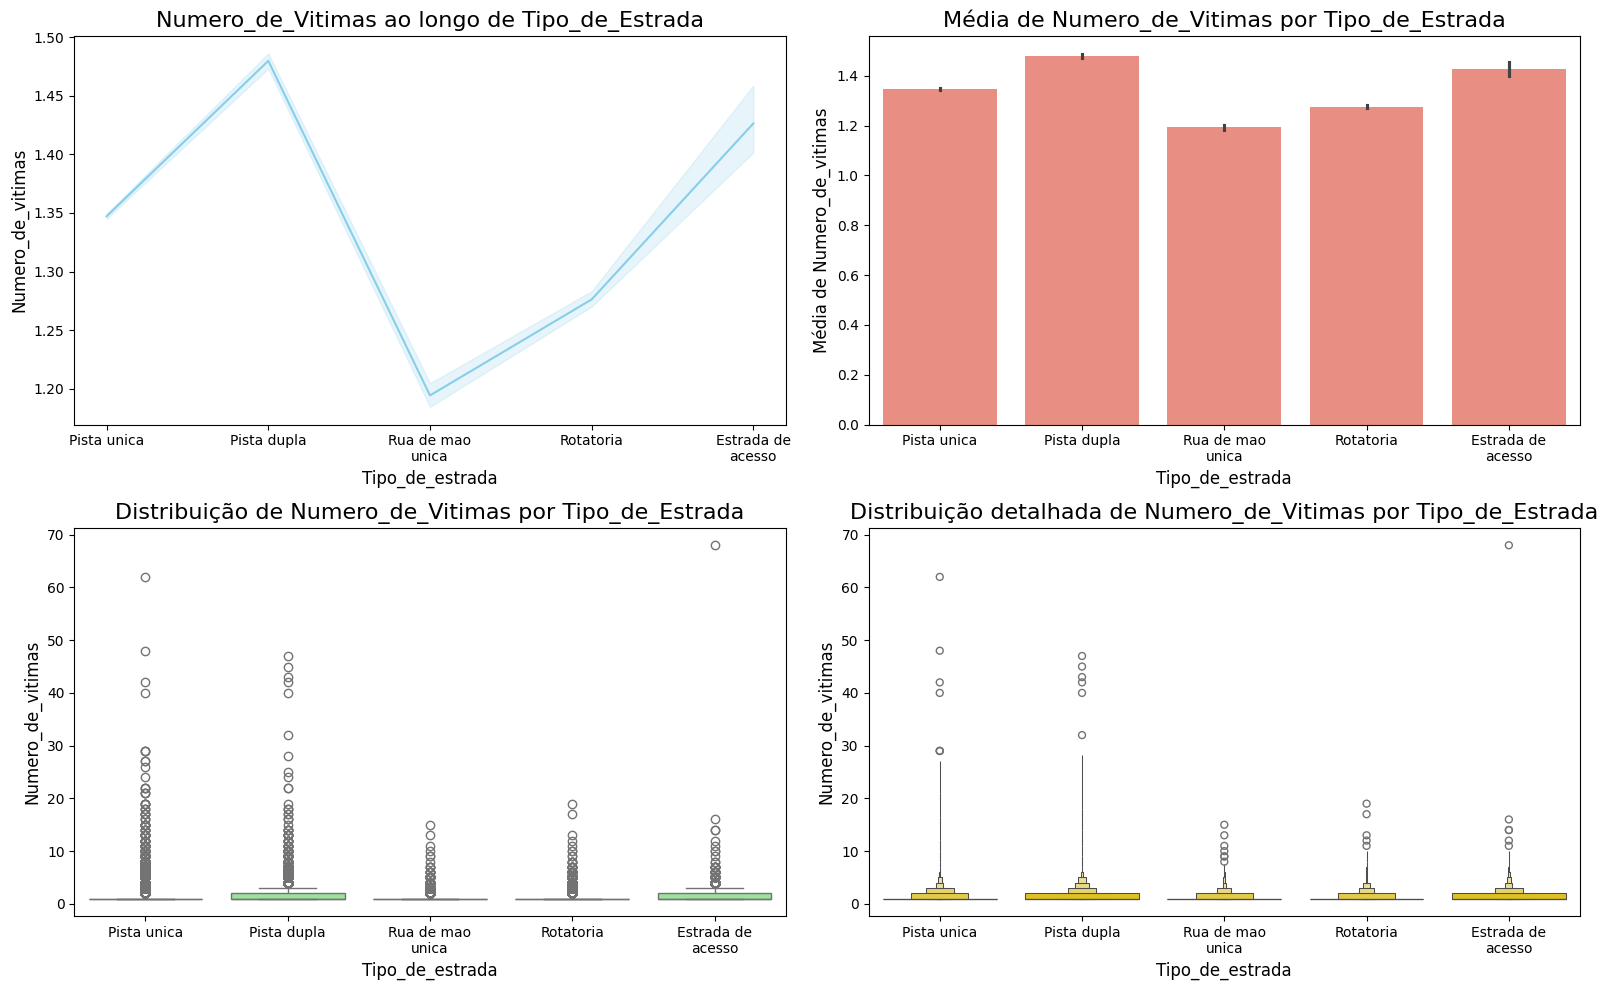

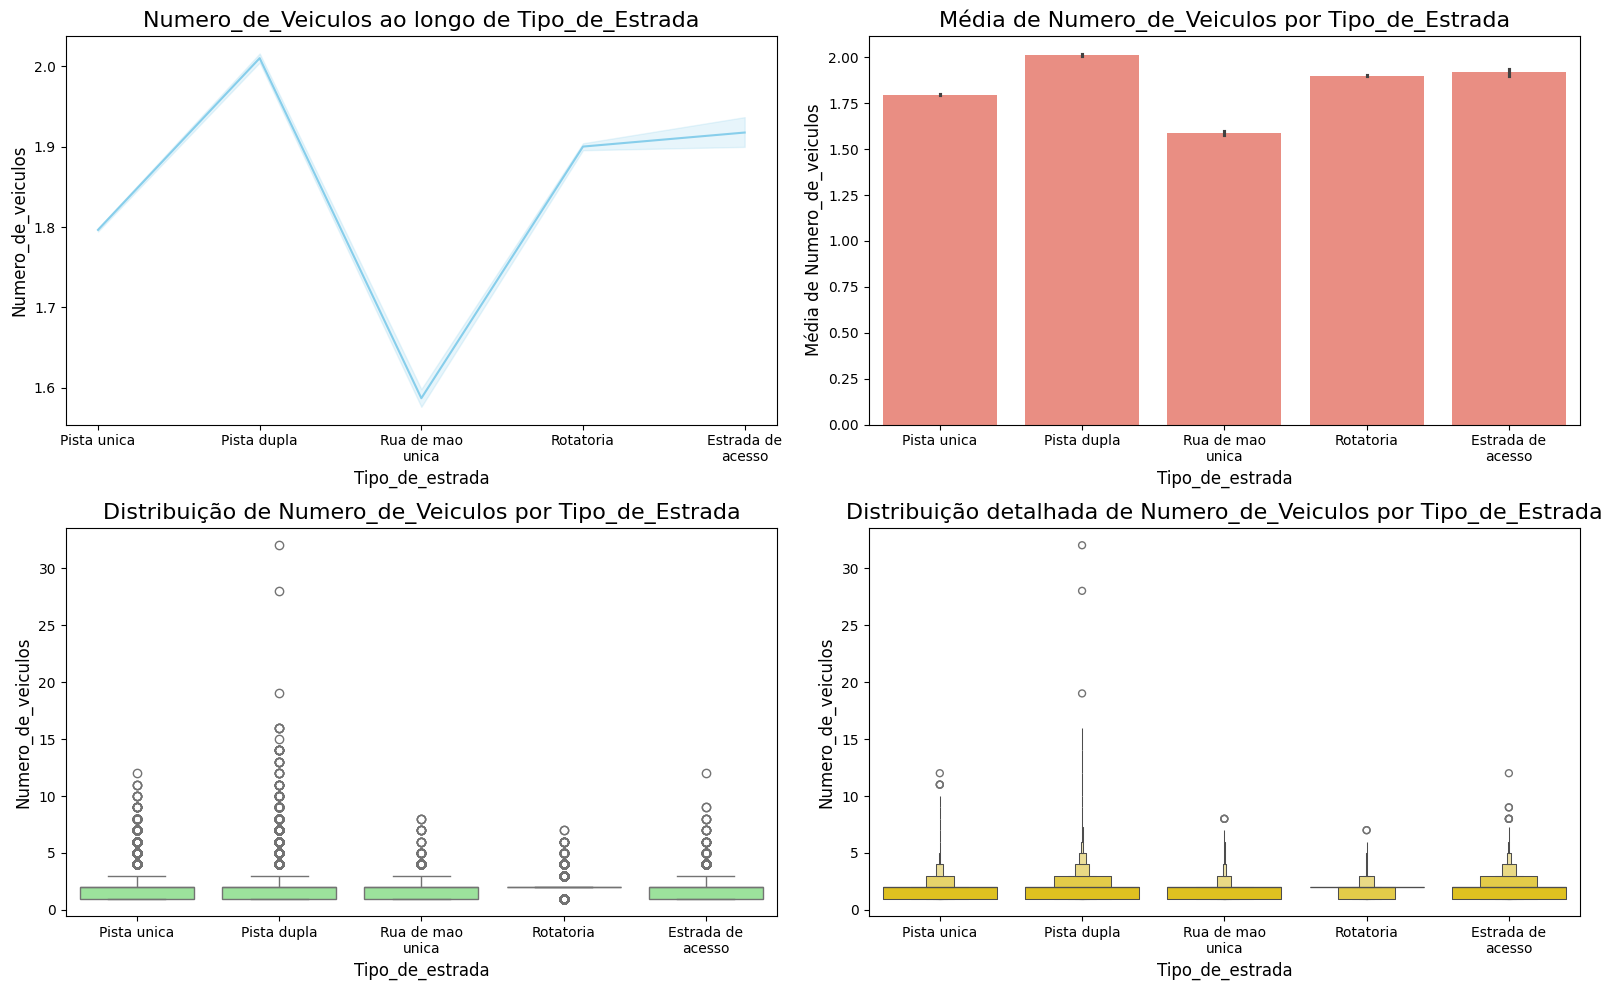

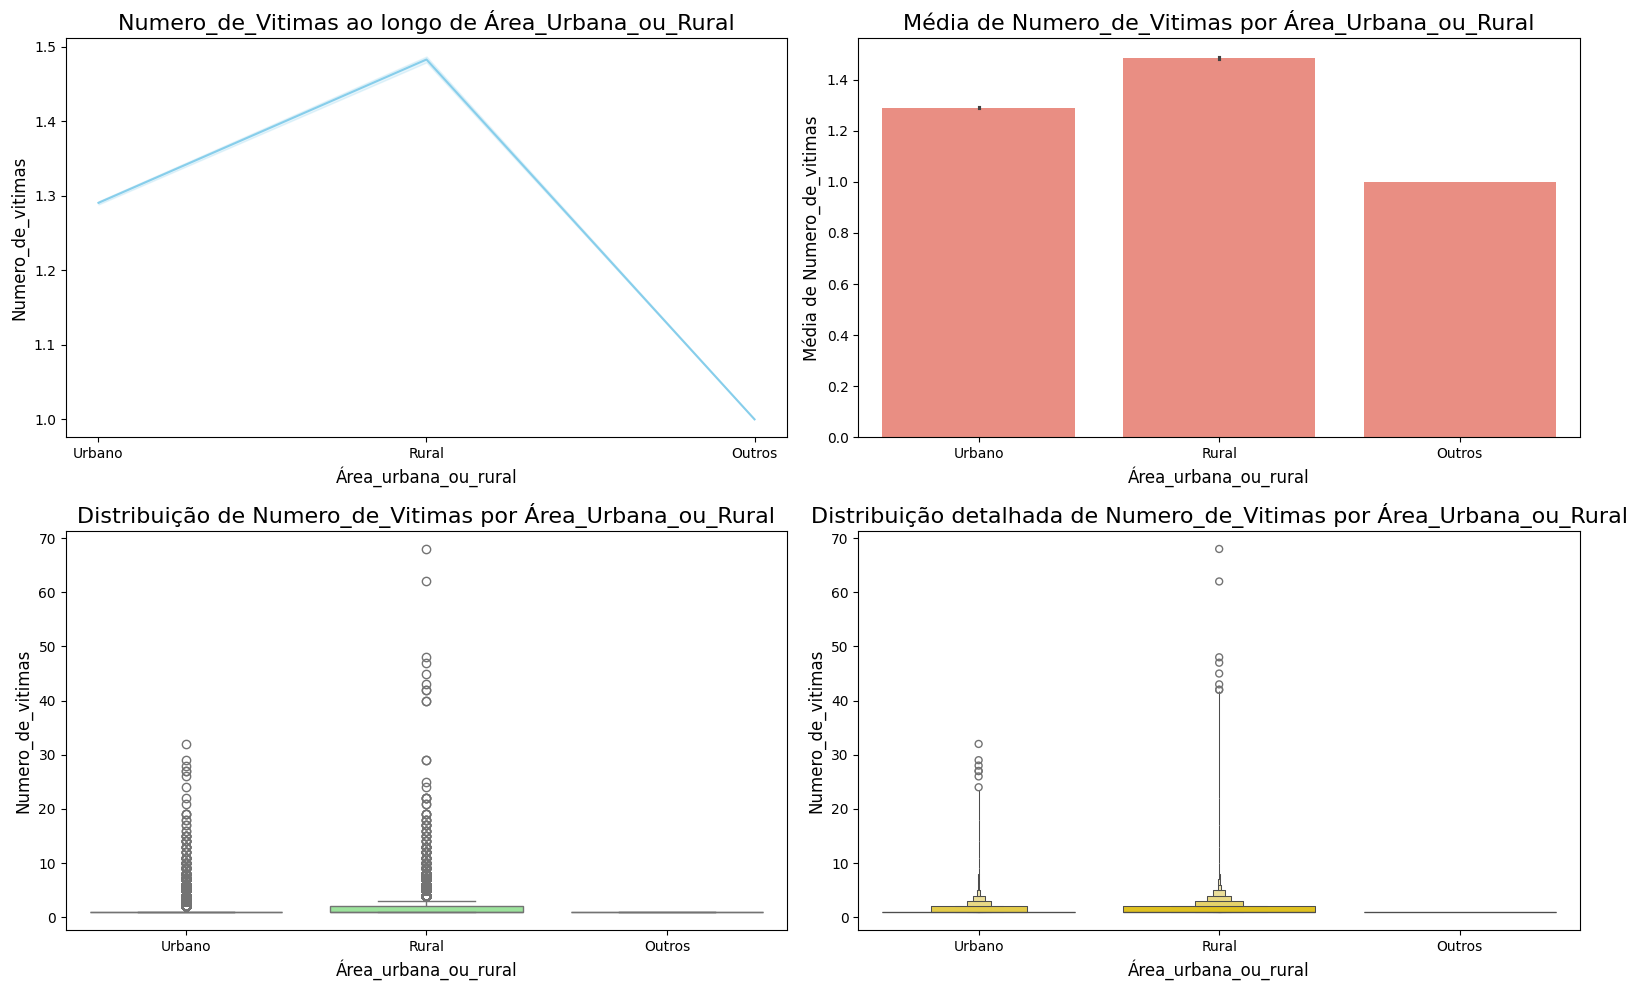

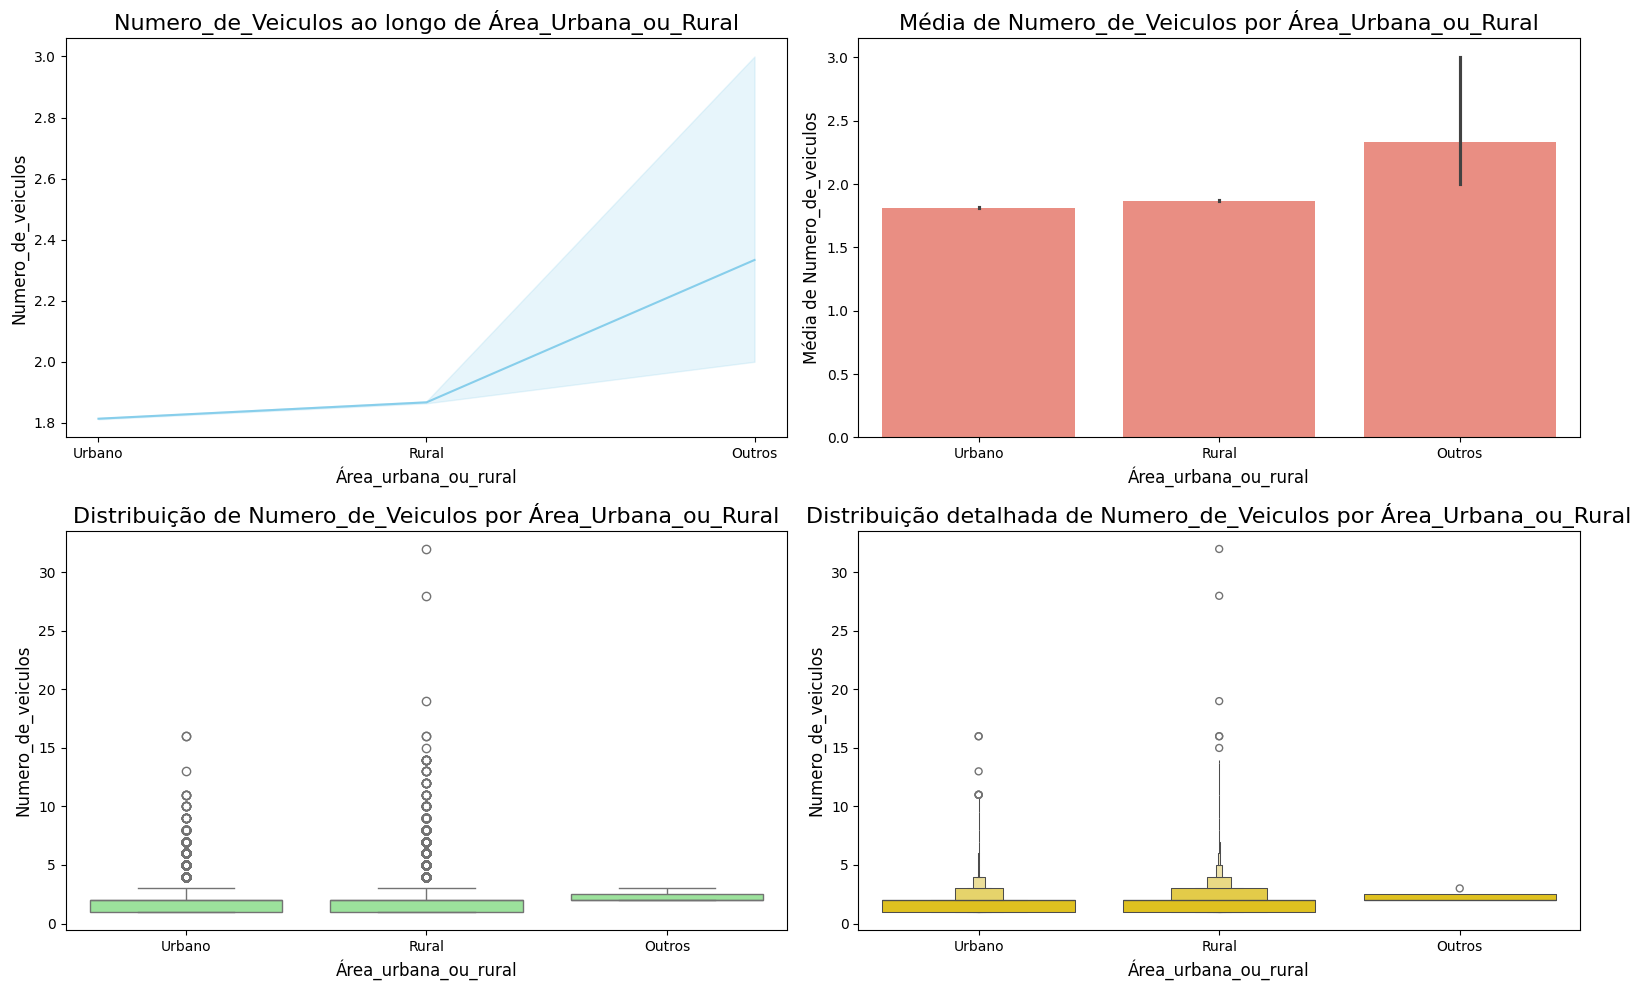

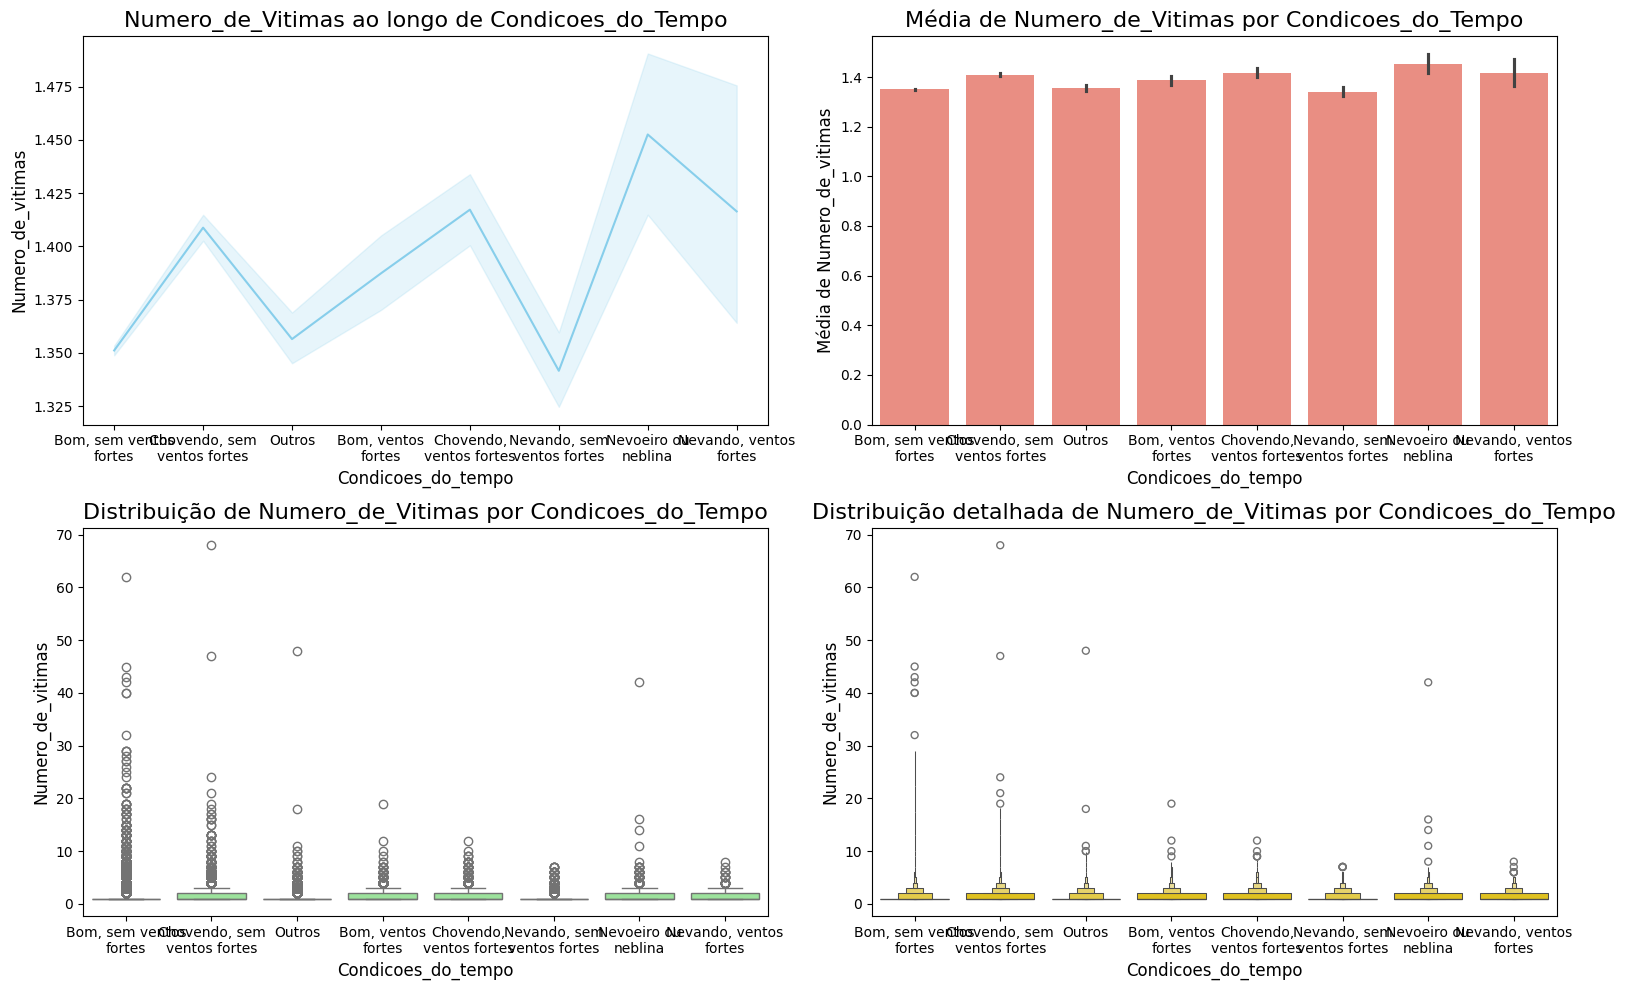

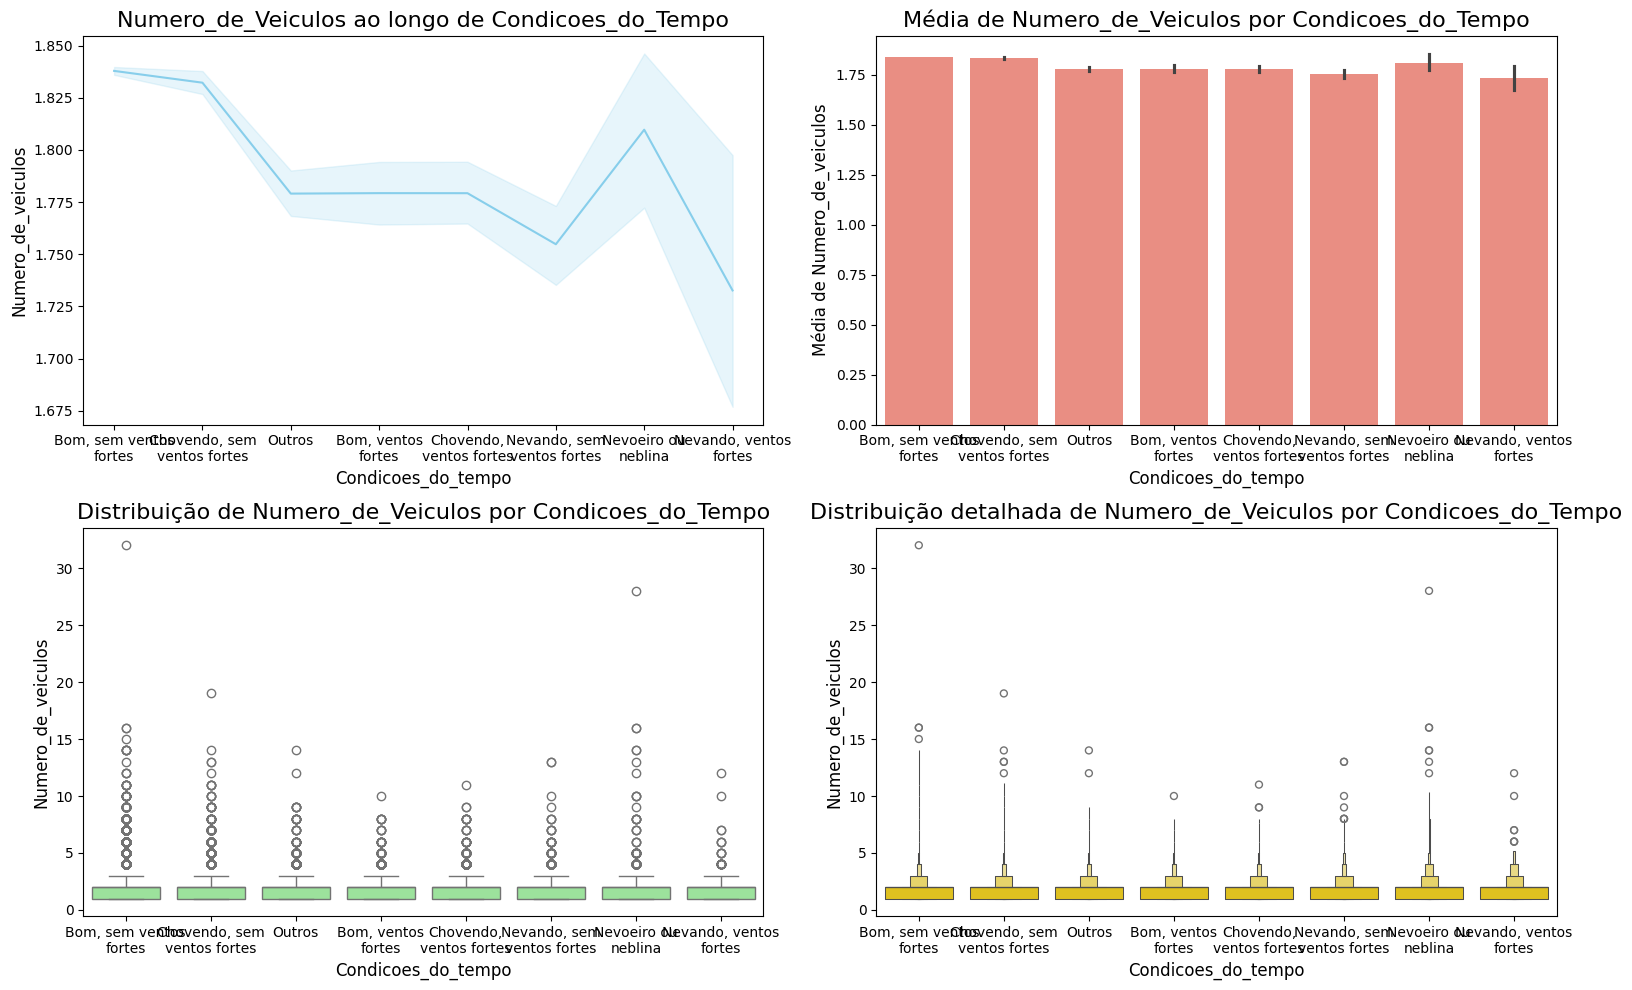

In [40]:
# combinações de variáveis categóricas e contínuas
for cat_var in categoricas:
    for cont_var in continuas:
        # criando a figura e os eixos
        fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

        # gráfico 1: Lineplot
        sns.lineplot(x=cat_var, y=cont_var, data=df, ax=axs[0, 0], color='skyblue')
        axs[0, 0].set_title(f'{cont_var} ao longo de {cat_var}', fontsize=16)
        axs[0, 0].set_xlabel(cat_var.capitalize(), fontsize=12)
        axs[0, 0].set_ylabel(cont_var.capitalize(), fontsize=12)
        labels = ['\n'.join(textwrap.wrap(str(label.get_text()), width=15)) for label in axs[0, 0].get_xticklabels()]
        axs[0, 0].set_xticklabels(labels, fontsize=10)

        # gráfico 2: Barplot
        sns.barplot(x=cat_var, y=cont_var, data=df, ax=axs[0, 1], color='salmon')
        axs[0, 1].set_title(f'Média de {cont_var} por {cat_var}', fontsize=16)
        axs[0, 1].set_xlabel(cat_var.capitalize(), fontsize=12)
        axs[0, 1].set_ylabel(f'Média de {cont_var.capitalize()}', fontsize=12)
        labels = ['\n'.join(textwrap.wrap(str(label.get_text()), width=15)) for label in axs[0, 1].get_xticklabels()]
        axs[0, 1].set_xticklabels(labels, fontsize=10)

        # gráfico 3: Boxplot
        sns.boxplot(x=cat_var, y=cont_var, data=df, ax=axs[1, 0], color='lightgreen')
        axs[1, 0].set_title(f'Distribuição de {cont_var} por {cat_var}', fontsize=16)
        axs[1, 0].set_xlabel(cat_var.capitalize(), fontsize=12)
        axs[1, 0].set_ylabel(cont_var.capitalize(), fontsize=12)
        labels = ['\n'.join(textwrap.wrap(str(label.get_text()), width=15)) for label in axs[1, 0].get_xticklabels()]
        axs[1, 0].set_xticklabels(labels, fontsize=10)

        # gráfico 4: Boxenplot
        sns.boxenplot(x=cat_var, y=cont_var, data=df, ax=axs[1, 1], color='gold')
        axs[1, 1].set_title(f'Distribuição detalhada de {cont_var} por {cat_var}', fontsize=16)
        axs[1, 1].set_xlabel(cat_var.capitalize(), fontsize=12)
        axs[1, 1].set_ylabel(cont_var.capitalize(), fontsize=12)
        labels = ['\n'.join(textwrap.wrap(str(label.get_text()), width=15)) for label in axs[1, 1].get_xticklabels()]
        axs[1, 1].set_xticklabels(labels, fontsize=10)

        # ajustando o layout
        plt.tight_layout()

        # mostrando os gráficos
        plt.show()


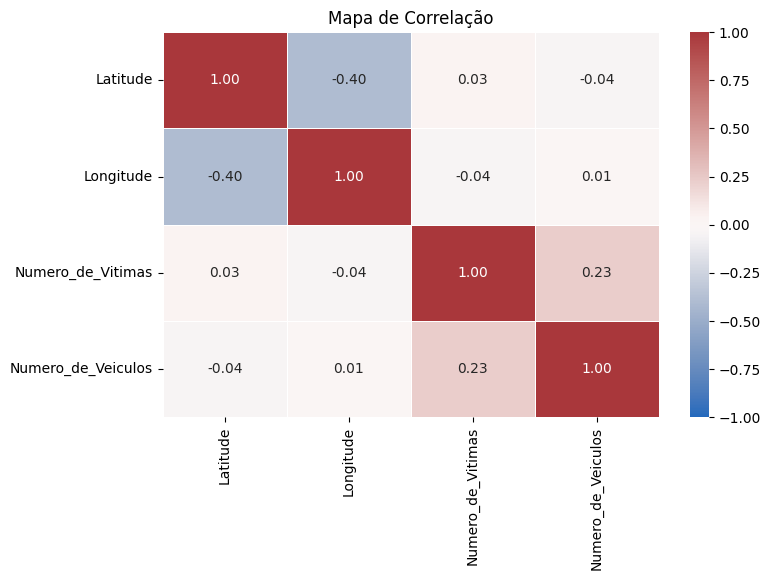

In [41]:
# criando mapa de correlação das variável numéricas

# criando a figura e os eixos
plt.figure(figsize = (8, 5), facecolor = 'white')

# criando o gráfico
sns.heatmap(
    data = df.corr(numeric_only=True),
    cmap = 'vlag',
    vmin = -1, vmax = 1,
    linecolor = 'white', linewidths = 0.5,
    annot = True,
    fmt = '.2f'
)
plt.title('Mapa de Correlação')
plt.show()

Não há correlação forte.

<Figure size 1000x600 with 0 Axes>

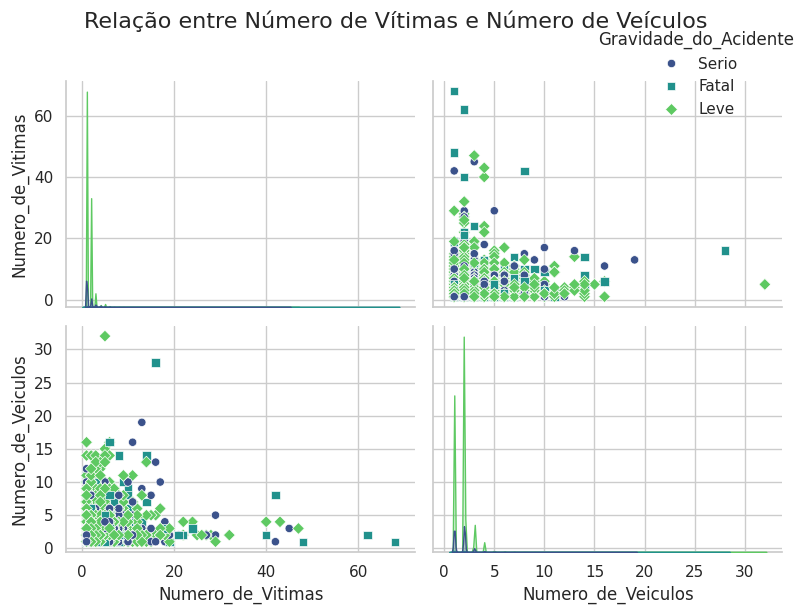

In [42]:
# relacionar a variável número de vitimas e veículos com gravidade do acidente 
# criando a figura e os eixos
sns.set(style="whitegrid")

# criando uma paleta de cores personalizada
colors = sns.color_palette("viridis", as_cmap=True)

# criando um gráfico pairplot
plt.figure(figsize=(10, 6))
plot = sns.pairplot(
    data=df,
    vars=['Numero_de_Vitimas', 'Numero_de_Veiculos'],
    hue='Gravidade_do_Acidente',  # adicione cores com base em uma variável categórica
    palette='viridis',  # usando a paleta de cores personalizada
    markers=["o", "s", "D"],  # usando marcadores diferentes para cada categoria
    diag_kind='kde',  # usando gráficos de densidade na diagonal
    height=3,  # altura dos subplots
)

# ajuste a posição da legenda
plot._legend.set_bbox_to_anchor((1, 0.9))  # ajustando as coordenadas conforme necessário

# adicione um título
plt.suptitle("Relação entre Número de Vítimas e Número de Veículos", y=1.02, fontsize=16)

# ajuste o layout
plt.tight_layout()

# mostra o gráfico
plt.show()


Análise de Séries Temporais

In [43]:
# fazendo uma copia do DF
df_new = df.copy()

In [44]:
# definindo a data com index
df_new.set_index('Data_do_Acidente', inplace = True)

In [45]:
df_new.head()

ID Gravidade_do_Acidente   Latitude  \
Data_do_Acidente                                                   
2019-06-05        200701BS64157                 Serio  51.506187   
2019-07-02        200701BS65737                 Serio  51.495029   
2019-08-16        200701BS66128                 Serio  51.495478   
2019-09-18        200701BS67159                 Serio  51.497750   
2019-09-05        200701BS67207                 Serio  51.501405   

                   Condicoes_de_Iluminacao          Area_Distrital  Longitude  \
Data_do_Acidente                                                                
2019-06-05        Escuridao - luzes acesas  Kensington and Chelsea  -0.209082   
2019-07-02                      Luz do dia  Kensington and Chelsea  -0.173647   
2019-08-16                      Luz do dia  Kensington and Chelsea  -0.202731   
2019-09-18                      Luz do dia  Kensington and Chelsea  -0.192556   
2019-09-05                      Luz do dia  Kensington and Chelsea  -0.161577   

                  Numero_de_Vitimas  Numero_de_Veiculos Condicoes_da_Estrada  \
Data_do_Acidente                                                               
2019-06-05                        1                   2                 Seco   
2019-07-02                        1                   2     Molhado ou umido   
2019-08-16                        1                   4                 Seco   
2019-09-18                        2                   3                 Seco   
2019-09-05                        1                   2                 Seco   

                 Tipo_de_Estrada Área_Urbana_ou_Rural  \
Data_do_Acidente                                        
2019-06-05           Pista unica               Urbano   
2019-07-02           Pista unica               Urbano   
2019-08-16           Pista unica               Urbano   
2019-09-18           Pista unica               Urbano   
2019-09-05           Pista dupla               Urbano   

                           Condicoes_do_Tempo  \
Data_do_Acidente                                
2019-06-05             Bom, sem ventos fortes   
2019-07-02        Chovendo, sem ventos fortes   
2019-08-16             Bom, sem ventos fortes   
2019-09-18             Bom, sem ventos fortes   
2019-09-05             Bom, sem ventos fortes   

                                       Tipo_de_Veiculo  
Data_do_Acidente                                        
2019-06-05                                         Car  
2019-07-02                                         Car  
2019-08-16        Bus or coach (17 or more pass seats)  
2019-09-18                                         Car  
2019-09-05         Van / Goods 3.5 tonnes mgw or under

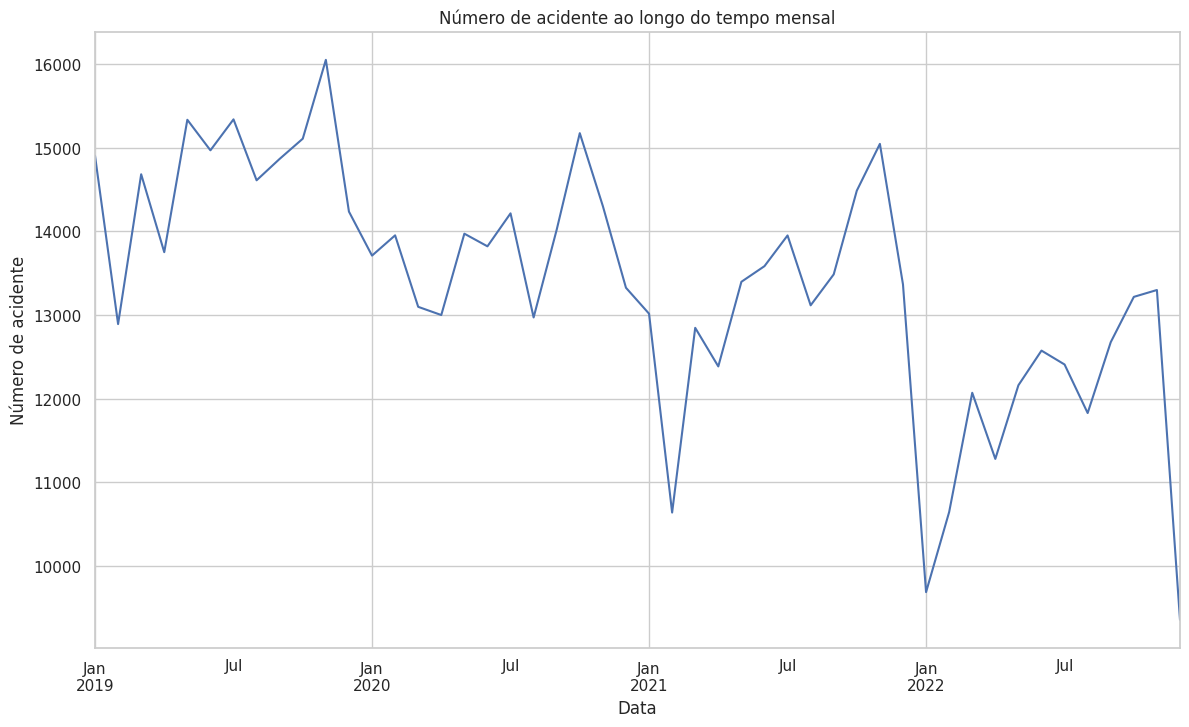

In [46]:
plt.figure(figsize = (14, 8))
df_new.resample('M').size().plot(legend = False)
plt.title('Número de acidente ao longo do tempo mensal')
plt.xlabel('Data')
plt.ylabel('Número de acidente')
plt.show()

Observamos que em janeiro há um queda no número de acidente

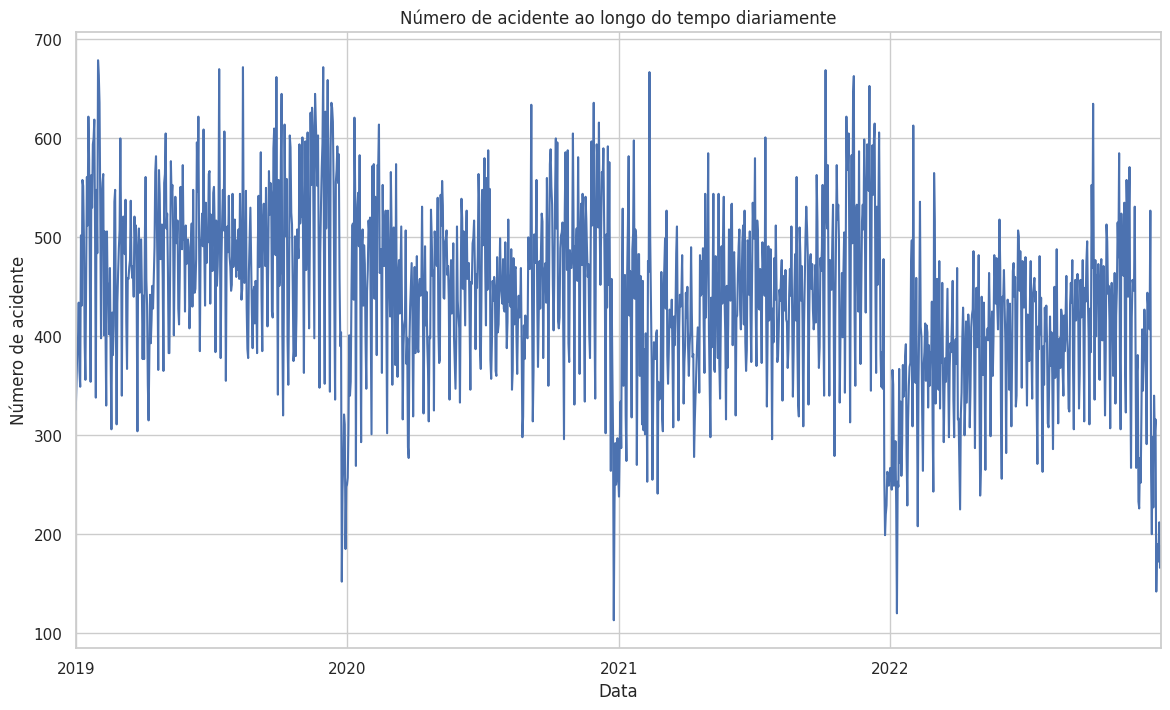

In [47]:
plt.figure(figsize = (14, 8))
df_new.resample('D').size().plot(legend = False)
plt.title('Número de acidente ao longo do tempo diariamente')
plt.xlabel('Data')
plt.ylabel('Número de acidente')
plt.show()

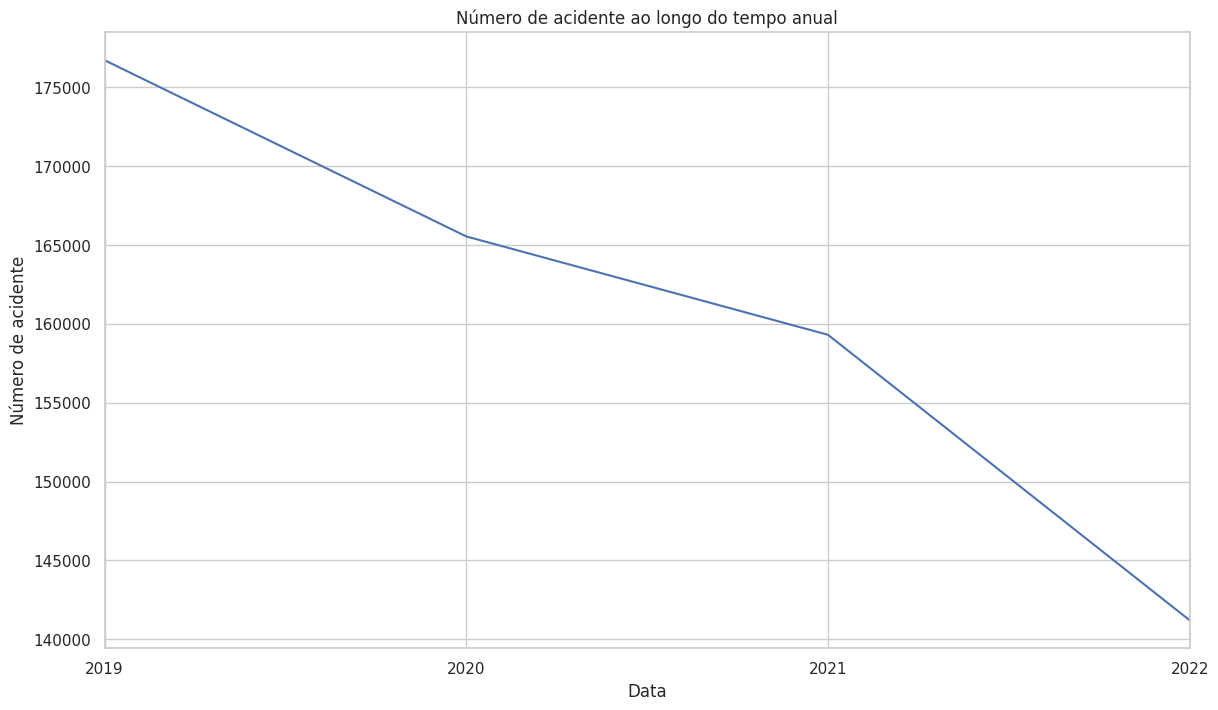

In [48]:
plt.figure(figsize = (14, 8))
df_new.resample('Y').size().plot(legend = False)
plt.title('Número de acidente ao longo do tempo anual')
plt.xlabel('Data')
plt.ylabel('Número de acidente')
plt.show()

Observamos que ao longo dos anos o número de acidente vem reduzindo

Utilizando a média móvel para suavizar a contagem diária de acidentes de trânsito

In [49]:
# vamos utilizar a média movel fazendo um comparativo de 7, 30 e 90 dias
df_new_count = df_new.groupby(['Data_do_Acidente']).agg({'Gravidade_do_Acidente' : 'count'})
df_new_count.rename(columns = {'Gravidade_do_Acidente' : 'T_Acidente'}, inplace = True)

# media movel
df_new_count['Media_Movel_7_Dias'] = df_new_count['T_Acidente'].rolling(window = 7).mean()
df_new_count['Media_Movel_30_Dias'] = df_new_count['T_Acidente'].rolling(window = 30).mean()
df_new_count['Media_Movel_90_Dias'] = df_new_count['T_Acidente'].rolling(window = 90).mean()

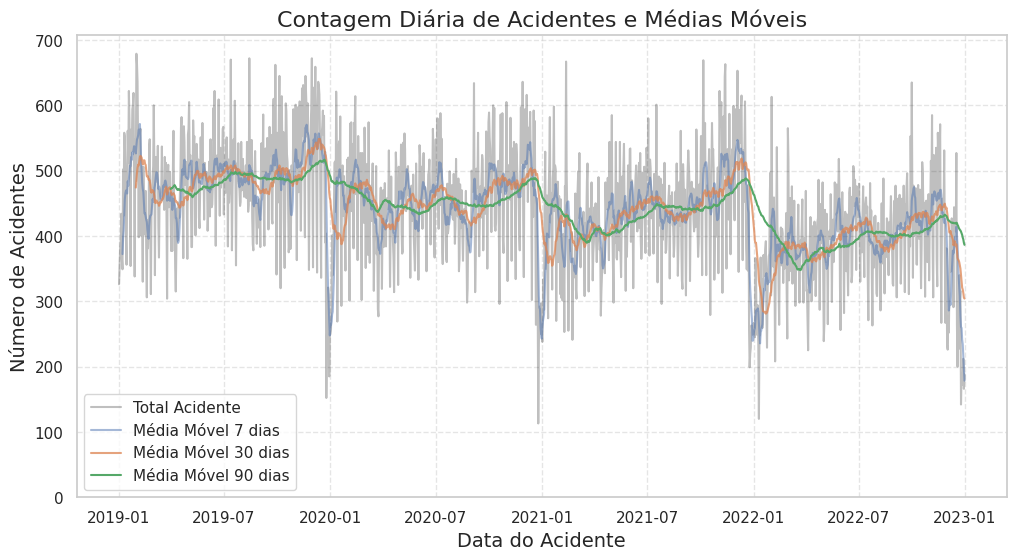

In [50]:
# configuração do gráfico
plt.figure(figsize=(12, 6), facecolor='white')

# linha original (Não Acidente)
sns.lineplot(
    data=df_new_count,
    x='Data_do_Acidente',
    y='T_Acidente',
    alpha=0.25,
    label='Total Acidente',
    color='black'  # definindo a cor da linha
)

# linhas de média móvel
sns.lineplot(
    data=df_new_count,
    x='Data_do_Acidente',
    y='Media_Movel_7_Dias',
    alpha=0.5,
    label='Média Móvel 7 dias'
)

sns.lineplot(
    data=df_new_count,
    x='Data_do_Acidente',
    y='Media_Movel_30_Dias',
    alpha=0.75,
    label='Média Móvel 30 dias'
)

sns.lineplot(
    data=df_new_count,
    x='Data_do_Acidente',
    y='Media_Movel_90_Dias',
    alpha=1,
    label='Média Móvel 90 dias'
)

# configuração adicional
plt.title('Contagem Diária de Acidentes e Médias Móveis', fontsize=16)
plt.xlabel('Data do Acidente', fontsize=14)
plt.ylabel('Número de Acidentes', fontsize=14)

# posicionando a legenda no canto inferior esquerdo
plt.legend(loc='lower left')

plt.ylim(bottom=0)  # garante que o eixo y começa de 0
plt.grid(True, linestyle='--', alpha=0.5)  # adiciona linhas de grade

# exibe o gráfico
plt.show()


Parece que o número de acidente esta em queda, mais como obersado nos gráficos anteriores o mês de Janeiro vem tendo uma queda segnificativa.

Vamos utilizar a tabela pivotada, é útil para visualizar como o número de vítimas varia ao longo do tempo, categorizado pela gravidade do acidente

In [51]:
tabela_pivot_result = pd.pivot_table(df_new, values = 'Numero_de_Vitimas', index = 'Data_do_Acidente', 
                                     columns= 'Gravidade_do_Acidente')
tabela_pivot_result

Gravidade_do_Acidente      Fatal      Leve     Serio
Data_do_Acidente                                    
2019-01-01              1.727273  1.492366  1.396226
2019-01-02              1.166667  1.373288  1.392857
2019-01-03             11.285714  1.327044  1.465517
2019-01-04              1.333333  1.378378  1.357143
2019-01-05              1.428571  1.301370  1.467742
...                          ...       ...       ...
2022-12-27              2.666667  1.430464  1.888889
2022-12-28              2.000000  1.506849  1.444444
2022-12-29              2.000000  1.358289  1.833333
2022-12-30                   NaN  1.400000  1.571429
2022-12-31              2.000000  1.281250  1.791667

[1461 rows x 3 columns]

In [52]:
# resetando o index para o original
df_new.reset_index(inplace = True)

In [53]:
# extrair o mês da data
df_new['Mes_Acidente'] = pd.DatetimeIndex(df_new['Data_do_Acidente']).month
df_new.head()

Data_do_Acidente             ID Gravidade_do_Acidente   Latitude  \
0       2019-06-05  200701BS64157                 Serio  51.506187   
1       2019-07-02  200701BS65737                 Serio  51.495029   
2       2019-08-16  200701BS66128                 Serio  51.495478   
3       2019-09-18  200701BS67159                 Serio  51.497750   
4       2019-09-05  200701BS67207                 Serio  51.501405   

    Condicoes_de_Iluminacao          Area_Distrital  Longitude  \
0  Escuridao - luzes acesas  Kensington and Chelsea  -0.209082   
1                Luz do dia  Kensington and Chelsea  -0.173647   
2                Luz do dia  Kensington and Chelsea  -0.202731   
3                Luz do dia  Kensington and Chelsea  -0.192556   
4                Luz do dia  Kensington and Chelsea  -0.161577   

   Numero_de_Vitimas  Numero_de_Veiculos Condicoes_da_Estrada Tipo_de_Estrada  \
0                  1                   2                 Seco     Pista unica   
1                  1                   2     Molhado ou umido     Pista unica   
2                  1                   4                 Seco     Pista unica   
3                  2                   3                 Seco     Pista unica   
4                  1                   2                 Seco     Pista dupla   

  Área_Urbana_ou_Rural           Condicoes_do_Tempo  \
0               Urbano       Bom, sem ventos fortes   
1               Urbano  Chovendo, sem ventos fortes   
2               Urbano       Bom, sem ventos fortes   
3               Urbano       Bom, sem ventos fortes   
4               Urbano       Bom, sem ventos fortes   

                        Tipo_de_Veiculo  Mes_Acidente  
0                                   Car             6  
1                                   Car             7  
2  Bus or coach (17 or more pass seats)             8  
3                                   Car             9  
4   Van / Goods 3.5 tonnes mgw or under             9

In [54]:
# agrupar e somar o número de acidente por mês
df_new_acidente_por_mes = df_new.groupby(['Mes_Acidente']).agg({'Gravidade_do_Acidente' : 'count'})
df_new_acidente_por_mes.rename(columns = {'Gravidade_do_Acidente' : 'T_Acidente'}, inplace = True)
df_new_acidente_por_mes

T_Acidente
Mes_Acidente            
1                  51315
2                  48126
3                  52694
4                  50414
5                  54859
6                  54944
7                  55909
8                  52522
9                  55044
10                 57979
11                 58690
12                 50282

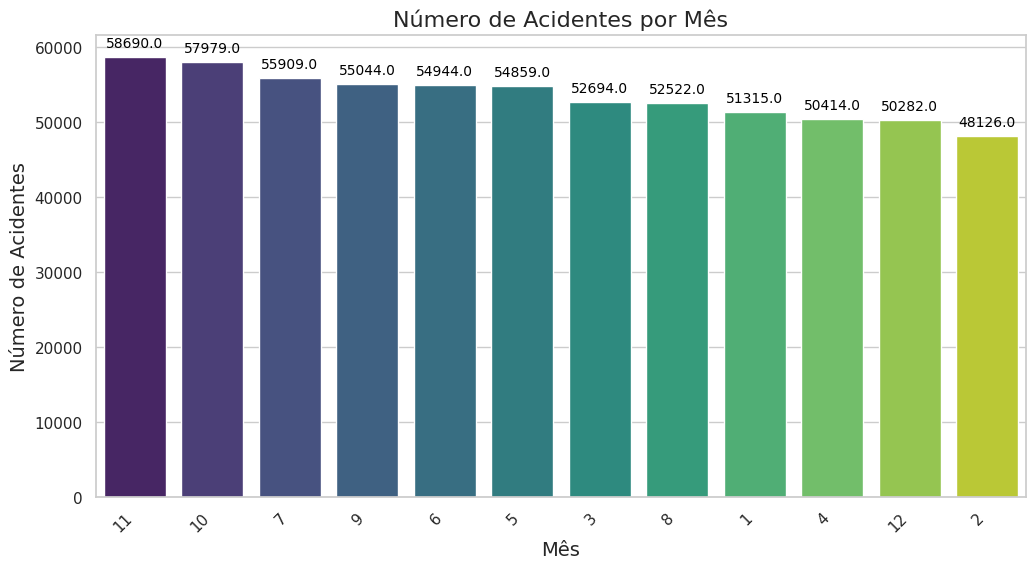

In [55]:
# Ordenar o DataFrame por T_Acidente
frequencia_acidente = df_new_acidente_por_mes.sort_values(by='T_Acidente', ascending=False)

# Configuração do gráfico
plt.figure(figsize=(12, 6), facecolor='white')

# Plotar o gráfico de barras com a paleta 'viridis'
ax = sns.barplot(
    data=df_new_acidente_por_mes,
    x=df_new_acidente_por_mes.index,
    y='T_Acidente',
    order=frequencia_acidente.index,
    palette='viridis'  # Especificar a paleta de cores
)

# Adicionar rótulos e título
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Número de Acidentes', fontsize=14)
plt.title('Número de Acidentes por Mês', fontsize=16)

# Adicionar informações nos rótulos das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right')

plt.show()


Utilizar a tabela de contingência para entender a relação entre as variáveis

In [56]:
crosstab_result = pd.crosstab(index = df_new['Gravidade_do_Acidente'], columns = df_new['Condicoes_do_Tempo'])
crosstab_result

Condicoes_do_Tempo     Bom, sem ventos fortes  Bom, ventos fortes  \
Gravidade_do_Acidente                                               
Fatal                                    7074                 175   
Leve                                   439097                7084   
Serio                                   71690                1241   

Condicoes_do_Tempo     Chovendo, sem ventos fortes  Chovendo, ventos fortes  \
Gravidade_do_Acidente                                                         
Fatal                                          848                      145   
Leve                                         68984                     8159   
Serio                                         9425                     1255   

Condicoes_do_Tempo     Nevando, sem ventos fortes  Nevando, ventos fortes  \
Gravidade_do_Acidente                                                       
Fatal                                          35                       3   
Leve                                         5610                     767   
Serio                                         562                     109   

Condicoes_do_Tempo     Nevoeiro ou neblina  Outros  
Gravidade_do_Acidente                               
Fatal                                   81     163  
Leve                                  2944   15058  
Serio                                  480    1789

In [57]:
crosstab_result = pd.crosstab(index = df_new['Gravidade_do_Acidente'], columns = df_new['Condicoes_de_Iluminacao'])
crosstab_result

Condicoes_de_Iluminacao  Escruridao - sem iluminacao  \
Gravidade_do_Acidente                                  
Fatal                                           1581   
Leve                                           28205   
Serio                                           7077   

Condicoes_de_Iluminacao  Escuridao - iluminacao desconhecida  \
Gravidade_do_Acidente                                          
Fatal                                                     54   
Leve                                                    4079   
Serio                                                    633   

Condicoes_de_Iluminacao  Escuridao - luz apagadas  Escuridao - luzes acesas  \
Gravidade_do_Acidente                                                         
Fatal                                          44                      1844   
Leve                                         2075                    106099   
Serio                                         353                     18824   

Condicoes_de_Iluminacao  Luz do dia  
Gravidade_do_Acidente                
Fatal                          5001  
Leve                         407245  
Serio                         59664

In [58]:
crosstab_result = pd.crosstab(index = df_new['Gravidade_do_Acidente'], columns = df_new['Condicoes_da_Estrada'])
crosstab_result

Condicoes_da_Estrada    Gelo  Inundacao acima de 3cm  Molhado ou umido  Neve  \
Gravidade_do_Acidente                                                          
Fatal                    189                      21              2580    35   
Leve                   16043                     823            157712  5209   
Serio                   1978                     150             23516   559   

Condicoes_da_Estrada     Seco  
Gravidade_do_Acidente          
Fatal                    5699  
Leve                   367916  
Serio                   60348

In [59]:
crosstab_result = pd.crosstab(index = df_new['Gravidade_do_Acidente'], columns = df_new['Tipo_de_Estrada'])
crosstab_result

Tipo_de_Estrada        Estrada de acesso  Pista dupla  Pista unica  Rotatoria  \
Gravidade_do_Acidente                                                           
Fatal                                 49         1790         6452        140   
Leve                                6239        84244       406699      39014   
Serio                                605        11604        69116       3603   

Tipo_de_Estrada        Rua de mao unica  
Gravidade_do_Acidente                    
Fatal                                93  
Leve                              11507  
Serio                              1623

In [60]:
crosstab_result = pd.crosstab(index = df_new['Gravidade_do_Acidente'], columns = df_new['Área_Urbana_ou_Rural'])
crosstab_result

Área_Urbana_ou_Rural   Outros   Rural  Urbano
Gravidade_do_Acidente                        
Fatal                       0    5513    3011
Leve                        3  191590  356110
Serio                       0   36757   49794

Encontrar o valor máximo, mínimo ou médio de número de vítimas para cada grupo formado por essas duas variáveis

In [61]:
groupby_result = df_new.groupby(['Gravidade_do_Acidente', 'Condicoes_do_Tempo'])['Numero_de_Vitimas'].max().unstack()
groupby_result

Condicoes_do_Tempo     Bom, sem ventos fortes  Bom, ventos fortes  \
Gravidade_do_Acidente                                               
Fatal                                      62                   9   
Leve                                       43                  19   
Serio                                      45                  10   

Condicoes_do_Tempo     Chovendo, sem ventos fortes  Chovendo, ventos fortes  \
Gravidade_do_Acidente                                                         
Fatal                                           68                        8   
Leve                                            47                       12   
Serio                                           21                        9   

Condicoes_do_Tempo     Nevando, sem ventos fortes  Nevando, ventos fortes  \
Gravidade_do_Acidente                                                       
Fatal                                           7                       3   
Leve                                            7                       8   
Serio                                           7                       6   

Condicoes_do_Tempo     Nevoeiro ou neblina  Outros  
Gravidade_do_Acidente                               
Fatal                                   42      48  
Leve                                    14       9  
Serio                                   11      18

In [62]:
groupby_result = df_new.groupby(['Gravidade_do_Acidente', 'Condicoes_do_Tempo'])['Numero_de_Vitimas'].min().unstack()
groupby_result

Condicoes_do_Tempo     Bom, sem ventos fortes  Bom, ventos fortes  \
Gravidade_do_Acidente                                               
Fatal                                       1                   1   
Leve                                        1                   1   
Serio                                       1                   1   

Condicoes_do_Tempo     Chovendo, sem ventos fortes  Chovendo, ventos fortes  \
Gravidade_do_Acidente                                                         
Fatal                                            1                        1   
Leve                                             1                        1   
Serio                                            1                        1   

Condicoes_do_Tempo     Nevando, sem ventos fortes  Nevando, ventos fortes  \
Gravidade_do_Acidente                                                       
Fatal                                           1                       2   
Leve                                            1                       1   
Serio                                           1                       1   

Condicoes_do_Tempo     Nevoeiro ou neblina  Outros  
Gravidade_do_Acidente                               
Fatal                                    1       1  
Leve                                     1       1  
Serio                                    1       1

In [63]:
groupby_result = df_new.groupby(['Gravidade_do_Acidente', 'Condicoes_do_Tempo'])['Numero_de_Vitimas'].mean().unstack()
groupby_result

Condicoes_do_Tempo     Bom, sem ventos fortes  Bom, ventos fortes  \
Gravidade_do_Acidente                                               
Fatal                                1.870512            1.822857   
Leve                                 1.326087            1.360390   
Serio                                1.453034            1.479452   

Condicoes_do_Tempo     Chovendo, sem ventos fortes  Chovendo, ventos fortes  \
Gravidade_do_Acidente                                                         
Fatal                                     2.041274                 1.965517   
Leve                                      1.380567                 1.385709   
Serio                                     1.558196                 1.558566   

Condicoes_do_Tempo     Nevando, sem ventos fortes  Nevando, ventos fortes  \
Gravidade_do_Acidente                                                       
Fatal                                    1.857143                2.666667   
Leve                                     1.321212                1.370274   
Serio                                    1.512456                1.706422   

Condicoes_do_Tempo     Nevoeiro ou neblina    Outros  
Gravidade_do_Acidente                                 
Fatal                             2.654321  2.276074  
Leve                              1.381793  1.323416  
Serio                             1.683333  1.550587

In [64]:
groupby_result = df_new.groupby(['Condicoes_do_Tempo', 'Gravidade_do_Acidente']).agg({'Gravidade_do_Acidente' : 'count'})
groupby_result

Gravidade_do_Acidente
Condicoes_do_Tempo          Gravidade_do_Acidente                       
Bom, sem ventos fortes      Fatal                                   7074
                            Leve                                  439097
                            Serio                                  71690
Bom, ventos fortes          Fatal                                    175
                            Leve                                    7084
                            Serio                                   1241
Chovendo, sem ventos fortes Fatal                                    848
                            Leve                                   68984
                            Serio                                   9425
Chovendo, ventos fortes     Fatal                                    145
                            Leve                                    8159
                            Serio                                   1255
Nevando, sem ventos fortes  Fatal                                     35
                            Leve                                    5610
                            Serio                                    562
Nevando, ventos fortes      Fatal                                      3
                            Leve                                     767
                            Serio                                    109
Nevoeiro ou neblina         Fatal                                     81
                            Leve                                    2944
                            Serio                                    480
Outros                      Fatal                                    163
                            Leve                                   15058
                            Serio                                   1789

In [66]:
groupby_result = df_new.groupby(['Condicoes_do_Tempo']).agg({'Numero_de_Vitimas' : ['count', 'mean', 'std']})
groupby_result

Numero_de_Vitimas                    
                                        count      mean       std
Condicoes_do_Tempo                                               
Bom, sem ventos fortes                 517861  1.351098  0.813914
Bom, ventos fortes                       8500  1.387294  0.820452
Chovendo, sem ventos fortes             79257  1.408759  0.899012
Chovendo, ventos fortes                  9559  1.417198  0.861526
Nevando, sem ventos fortes               6207  1.341550  0.717840
Nevando, ventos fortes                    879  1.416382  0.846811
Nevoeiro ou neblina                      3505  1.452496  1.149293
Outros                                  17010  1.356437  0.844132

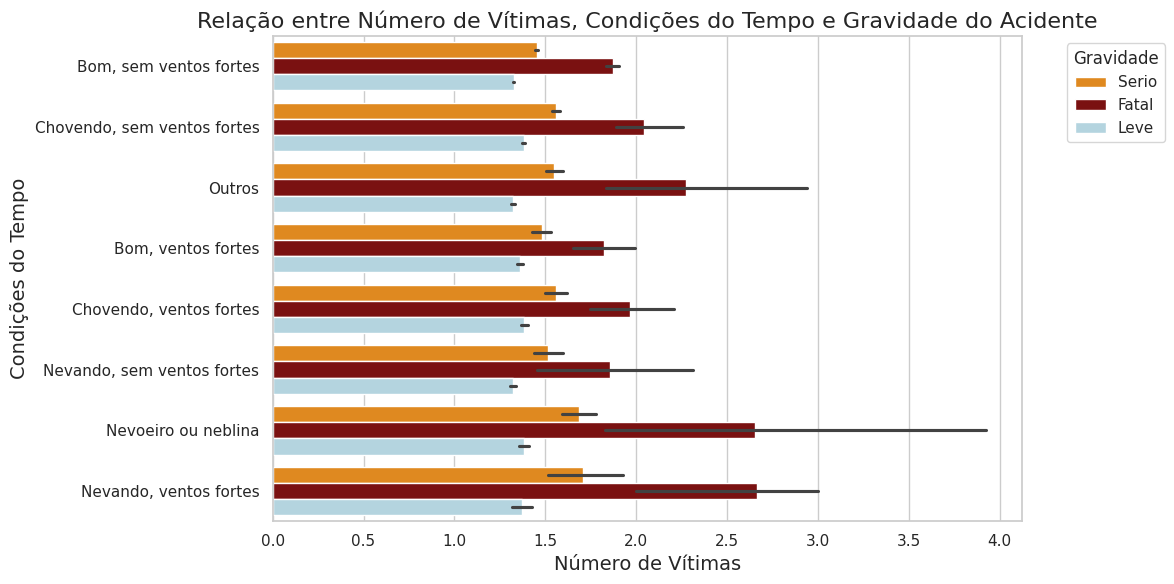

In [70]:
# Criar uma paleta de cores mais distinta para as diferentes gravidades
palette = {'Leve': 'lightblue', 'Fatal': 'darkred', 'Serio': 'darkorange'}

# Melhorar o tamanho do gráfico e adicionar título
plt.figure(figsize=(12, 6), facecolor='white')
plt.title('Relação entre Número de Vítimas, Condições do Tempo e Gravidade do Acidente', fontsize=16)

# Usar o método barplot do Seaborn
sns.barplot(
    data=df_new,
    x='Numero_de_Vitimas',
    y='Condicoes_do_Tempo',
    hue='Gravidade_do_Acidente',
    palette=palette  # Aplicar a paleta de cores definida
)

# Adicionar rótulos aos eixos
plt.xlabel('Número de Vítimas', fontsize=14)
plt.ylabel('Condições do Tempo', fontsize=14)

# Adicionar legenda fora do gráfico para melhorar a clareza
plt.legend(title='Gravidade', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar o layout para evitar que o título seja cortado
plt.tight_layout()

# Exibir o gráfico
plt.show()


Como esta a distribuição geográfica

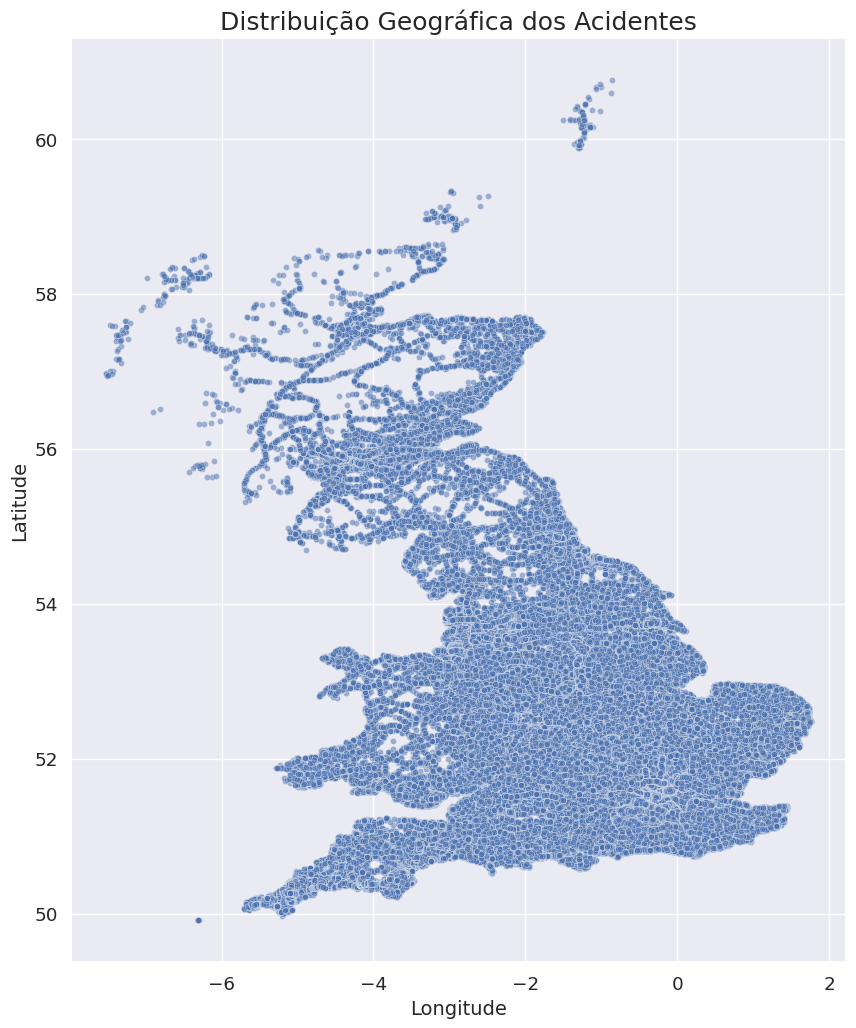

In [73]:
# Ajuste do tamanho da fonte para melhor visibilidade
sns.set(font_scale=1.2)

# Melhorar o tamanho do gráfico
plt.figure(figsize=(10, 12), facecolor='white')

# Scatterplot com tamanho de ponto ajustado e paleta de cores
sns.scatterplot(
    data=df_new,
    x='Longitude',
    y='Latitude',
    alpha=0.5,  # Ajuste da transparência
    s=20  # Ajuste do tamanho dos pontos
)

# Adicionar título e rótulos
plt.title('Distribuição Geográfica dos Acidentes', fontsize=18)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

# Exibir o gráfico
plt.show()
